In [1]:
# Data manipulation & handling libraries
import pandas as pd 
import numpy as np 

# Data visualisation libraries
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as sci

# VIF library
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Data preprocessing libraries
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.decomposition import PCA
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer,SimpleImputer,KNNImputer

# Model selection libraries
from sklearn.model_selection import train_test_split,StratifiedKFold,cross_val_score

# Machine learning libraries
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier,RandomForestClassifier
import xgboost

from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,accuracy_score,f1_score
from sklearn.naive_bayes import GaussianNB

# Hyperparameter tuning parameters
from sklearn.model_selection import RandomizedSearchCV

# Clustering
from sklearn.cluster import KMeans

# Feature importance library
from sklearn.feature_selection import RFE

# Learning curve analysis
from sklearn.model_selection import learning_curve

# Deep learning libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

import warnings
warnings.filterwarnings('ignore')

## Loading the dataset

In [2]:
df = pd.read_excel('Rocket_Loans.xlsx')

In [3]:
df.head()

,Loan_ID,Sex,Age,Married,No. of People in the Family,Qualification,Self_Employed,Loan_Bearer_Income,Loan_Cobearer_Income,Amount Disbursed,Loan_Tenure,Credit_Score,Location_type,Loan_Status
0,LP001002,Male,33,No,0,Graduate,No,5849,0.0,108.0,360.0,1.0,Urban,Y
1,LP001003,Male,34,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,31,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,33,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,48,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df.shape

(614, 14)

In [5]:
df.duplicated().sum()

0

In [6]:
df.drop('Loan_ID',axis=1,inplace=True)

In [7]:
df.head()

,Sex,Age,Married,No. of People in the Family,Qualification,Self_Employed,Loan_Bearer_Income,Loan_Cobearer_Income,Amount Disbursed,Loan_Tenure,Credit_Score,Location_type,Loan_Status
0,Male,33,No,0,Graduate,No,5849,0.0,108.0,360.0,1.0,Urban,Y
1,Male,34,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,31,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,33,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,48,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [8]:
df.columns

Index(['Sex', 'Age', 'Married', 'No. of People in the Family', 'Qualification',
       'Self_Employed', 'Loan_Bearer_Income', 'Loan_Cobearer_Income',
       'Amount Disbursed', 'Loan_Tenure', 'Credit_Score', 'Location_type',
       'Loan_Status'],
      dtype='object')

In [9]:
len(df.columns)

13

## Problem statement: 
    - To predict loan approval (1 or 0) based on applicant's details

## Studying the dataset

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Sex                          601 non-null    object 
 1   Age                          614 non-null    int64  
 2   Married                      611 non-null    object 
 3   No. of People in the Family  599 non-null    object 
 4   Qualification                614 non-null    object 
 5   Self_Employed                582 non-null    object 
 6   Loan_Bearer_Income           614 non-null    int64  
 7   Loan_Cobearer_Income         614 non-null    float64
 8   Amount Disbursed             593 non-null    float64
 9   Loan_Tenure                  600 non-null    float64
 10  Credit_Score                 564 non-null    float64
 11  Location_type                614 non-null    object 
 12  Loan_Status                  614 non-null    object 
dtypes: float64(4), int64

### Analysis:
    - From the result it can be seen that there are a few null values in sex(13),married(3),no.of people in 
    family(15),self_employed(32),amount_disbursed(21),loan_tenure(14),credit_score(50) columns

In [11]:
df.describe(include=[np.number])

,Age,Loan_Bearer_Income,Loan_Cobearer_Income,Amount Disbursed,Loan_Tenure,Credit_Score
count,614.000000,614.000000,614.000000,593.000000,600.00000,564.000000
mean,38.469055,5403.459283,1621.245798,146.347386,342.00000,0.842199
std,8.124732,6109.041673,2926.248369,85.529555,65.12041,0.364878
min,25.000000,150.000000,0.000000,9.000000,12.00000,0.000000
25%,32.000000,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,39.000000,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,45.000000,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,52.000000,81000.000000,41667.000000,700.000000,480.00000,1.000000


### Analysis:
    1. The age feature can be considered as a normal distribution since mean is equal to median
    2. Loan_bearer_income,loan_cobearer_income are highly positively skewed since mean is greater than median and there may be outliers beyond the upper whisker region
    3. Amount_disbursed is highly positively skewed with outliers beyond the upper whisker
    4. loan_tenure is moderately negatively skewed with a few outliers in the lower whisker region

In [12]:
df.describe(include=[np.object])

,Sex,Married,No. of People in the Family,Qualification,Self_Employed,Location_type,Loan_Status
count,601,611,599,614,582,614,614
unique,2,2,4,2,2,3,2
top,Male,Yes,0,Graduate,No,Semiurban,Y
freq,489,398,345,480,500,233,422


### Analysis:
    - The target variable being loan_status is an imbalanced categorical variable

In [13]:
for i in df.columns:
    print(f'The number of unique values in {i} is {df[i].nunique()}')
    if(df[i].nunique() <= 10):
        print(df[i].value_counts())

The number of unique values in Sex is 2
Male      489
Female    112
Name: Sex, dtype: int64
The number of unique values in Age is 28
The number of unique values in Married is 2
Yes    398
No     213
Name: Married, dtype: int64
The number of unique values in No. of People in the Family is 4
0     345
1     102
2     101
3+     51
Name: No. of People in the Family, dtype: int64
The number of unique values in Qualification is 2
Graduate        480
Not Graduate    134
Name: Qualification, dtype: int64
The number of unique values in Self_Employed is 2
No     500
Yes     82
Name: Self_Employed, dtype: int64
The number of unique values in Loan_Bearer_Income is 505
The number of unique values in Loan_Cobearer_Income is 287
The number of unique values in Amount Disbursed is 203
The number of unique values in Loan_Tenure is 10
360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Tenure, dtype: int64
The numbe

### Analysis:
    - As seen sex,married,no. of people in family,qualification,self_employed,loan_tenure,credit_score,location_type,
    loan_status can be considered as categorical variables

###  loan approval rate for applicants having credit score

In [117]:
round((df.groupby('Credit_Score')['Loan_Status'].count().sort_values(ascending=False)[1]/df['Credit_Score'].count())*100,2)

84.22

### frequency distribution of total income
(i.e. Total Income = Loan_bearer_income + Loan_Cobearer_income)
 - Below 5k
 - 5k to 10k
 - 10k to 15k
 - Above 15k

In [123]:
df1 = pd.read_excel('Rocket_Loans.xlsx')

In [124]:
df1

,Loan_ID,Sex,Age,Married,No. of People in the Family,Qualification,Self_Employed,Loan_Bearer_Income,Loan_Cobearer_Income,Amount Disbursed,Loan_Tenure,Credit_Score,Location_type,Loan_Status
0,LP001002,Male,33,No,0,Graduate,No,5849,0.0,108.0,360.0,1.0,Urban,Y
1,LP001003,Male,34,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,31,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,33,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,48,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,28,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,33,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,39,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,47,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [130]:
df1['Loan_Bearer_Income'] + df1['Loan_Cobearer_Income'].value_counts()

0.0        6122.0
1.0           NaN
2.0           NaN
3.0           NaN
4.0           NaN
            ...  
10968.0       NaN
11300.0       NaN
20000.0       NaN
33837.0       NaN
41667.0       NaN
Length: 893, dtype: float64

In [132]:
df1['freq'] = pd.cut(x=df1['Loan_Bearer_Income'] + df1['Loan_Cobearer_Income'],
                  bins=[0,5000,10000,15000,41667],include_lowest=True,labels=['Below 5k','5k to 10k','10k to 15k','Above 15k'])

In [138]:
freq_table = pd.crosstab(df1['freq'],'frequency')

In [139]:
freq_table

col_0,frequency
freq,
Below 5k,270
5k to 10k,257
10k to 15k,51
Above 15k,31


## Exploratory Descriptive Analysis

### 1. Custom descriptive statistics function

In [14]:
def num_custom_summary(data):
    result = []
    from collections import OrderedDict
    
    for i in data.columns:
        stats = OrderedDict({'Column name': i,
                             'Data type':data[i].dtype,
                            'Count':data[i].notnull().count(),
                            'Non-null values':data[i].notnull().sum(),
                            'Null values':data[i].isnull().sum(),
                            'Minimum':data[i].min(),
                            'Q1':data[i].quantile(0.25),
                            'Mean':data[i].mean(),
                            'Q2':data[i].quantile(0.5),
                            'Q3':data[i].quantile(0.75),
                            'Maximum':data[i].max(),
                             'Variance':data[i].var(),
                             'Std Dev':data[i].std(),
                            'Kurtosis':data[i].kurt(),
                            'Skewness':data[i].skew(),
                            'IQR':data[i].quantile(0.75) - data[i].quantile(0.25)})
        result.append(stats)
        
        # Labels for skewness
        if data[i].skew() >= 1:
            slabel = 'Highly positively skewed'
        elif 0.5 <= data[i].skew() < 1:
            slabel = 'Moderately positively skewed'
        elif 0 <= data[i].skew() < 0.5:
            slabel = 'Fairly Symmetric(positive)'
        elif -0.5 <= data[i].skew() < 0:
            slabel = 'Fairly symmetric(negative)'
        elif -1 <= data[i].skew() < -0.5:
            slabel = 'Moderately negatively skewed'
        elif data[i].skew() <= -1:
            slabel = 'Highly negatively skewed'
        else:
            slabel = 'Error'
        stats['Skewness comments'] = slabel
        
        # Labels for outliers
        upper_whisker = stats['Q3'] + stats['IQR']*1.5
        lower_whisker = stats['Q1'] - stats['IQR']*1.5
        if len([x for x in data[i] if x < lower_whisker or x > upper_whisker]) > 0:
            olabel = 'Has outliers'
        else:
            olabel = 'No outliers'
        
        stats['Outlier comments'] = olabel
        stats['No. of outliers'] = len((data.loc[(data[i]< lower_whisker) | (data[i]> upper_whisker)]))
        
        result_df = pd.DataFrame(data=result)
    result_df = result_df.T
    result_df.rename(columns=result_df.iloc[0, :], inplace=True) 
    result_df.drop(result_df.index[0], inplace=True)
    return result_df

In [15]:
num_df = df[['Age','Loan_Bearer_Income','Loan_Cobearer_Income','Amount Disbursed']]
cat_df = df[['Sex','Married','No. of People in the Family','Qualification','Self_Employed','Loan_Tenure',
             'Credit_Score','Location_type','Loan_Status']]

In [16]:
num_custom_summary(num_df)

,Age,Loan_Bearer_Income,Loan_Cobearer_Income,Amount Disbursed
Data type,int64,int64,float64,float64
Count,614,614,614,614
Non-null values,614,614,614,593
Null values,0,0,0,21
Minimum,25.0,150.0,0.0,9.0
Q1,32.0,2877.5,0.0,100.0
Mean,38.469055,5403.459283,1621.245798,146.347386
Q2,39.0,3812.5,1188.5,128.0
Q3,45.0,5795.0,2297.25,168.0
Maximum,52.0,81000.0,41667.0,700.0


#### Analysis:
    1. The Amount Disbursed feature is the only one with null values 
    2. Loan_Bearer_Income,Loan_Cobearer_Income,Amount Disbursed contain sufficient amount of outliers and are highly positively skewed

In [17]:
def cat_custom_summary(data):
    from collections import OrderedDict
    result =[]
    
    for i in data.columns:
        stats = OrderedDict({'Column name':i,
                            'Data type':data[i].dtype,
                            'Count':data[i].notnull().count(),
                            'Non-null values':data[i].notnull().sum(),
                            'Null values':data[i].isnull().sum(),
                            'No. of unique values':data[i].nunique(),
                            'Category with highest records':data[i].value_counts().idxmax(),
                             'Highest no. of records':data[i].value_counts().max(),
                            'Category with lowest records':data[i].value_counts().idxmin(),
                             'Lowest no. of records':data[i].value_counts().min(),
                            })
        result.append(stats)
    result_df = pd.DataFrame(data=result)
    result_df = result_df.T
    result_df.rename(columns=result_df.iloc[0, :], inplace=True) 
    result_df.drop(result_df.index[0], inplace=True)
    return result_df

In [18]:
cat_custom_summary(cat_df)

,Sex,Married,No. of People in the Family,Qualification,Self_Employed,Loan_Tenure,Credit_Score,Location_type,Loan_Status
Data type,object,object,object,object,object,float64,float64,object,object
Count,614,614,614,614,614,614,614,614,614
Non-null values,601,611,599,614,582,600,564,614,614
Null values,13,3,15,0,32,14,50,0,0
No. of unique values,2,2,4,2,2,10,2,3,2
Category with highest records,Male,Yes,0,Graduate,No,360.0,1.0,Semiurban,Y
Highest no. of records,489,398,345,480,500,512,475,233,422
Category with lowest records,Female,No,3+,Not Graduate,Yes,12.0,0.0,Rural,N
Lowest no. of records,112,213,51,134,82,1,89,179,192


#### Analysis:
    1. Except Qualification,Location_type and Loan_Status the rest of the categorical features have null values

### 2. Dealing with missing values

In [19]:
df.isnull().sum()

Sex                            13
Age                             0
Married                         3
No. of People in the Family    15
Qualification                   0
Self_Employed                  32
Loan_Bearer_Income              0
Loan_Cobearer_Income            0
Amount Disbursed               21
Loan_Tenure                    14
Credit_Score                   50
Location_type                   0
Loan_Status                     0
dtype: int64

#### Analysis:
    1. Since there is no feature with more than 30% null values there is no need to delete any of the features
    2. Any form of imputation method will be suffice for missing value treatment

In [20]:
null_data = df[df.isnull().any(axis=1)]
a = null_data.isnull().sum(axis=1).tolist()

In [21]:
j = 0
for i in range (0,len(a)):
    if a[i] >= 10:
        print('The {i} row has most values missing')
        j = i+1
if j == 0:
    print(f'There is no row amoung {null_data.shape[0]} rows that has more than 75% values missing')

There is no row amoung 133 rows that has more than 75% values missing


#### Analysis:
    1. Hence we don't need to consider deleting any rows

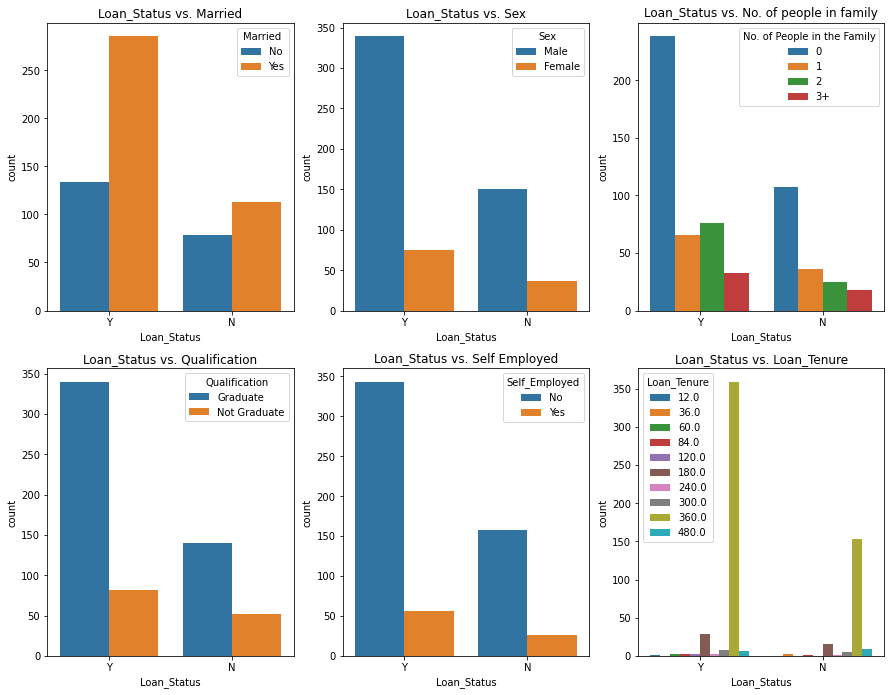

In [22]:
fig = plt.figure(figsize = (15,18))

ax = fig.add_subplot(3,3,1) 
sns.countplot(x='Loan_Status',hue='Married',data=df)
ax.title.set_text('Loan_Status vs. Married')


ax = fig.add_subplot(3,3,2)
sns.countplot(x='Loan_Status',hue='Sex',data=df)
ax.title.set_text('Loan_Status vs. Sex')

ax = fig.add_subplot(3,3,3) 
sns.countplot(x='Loan_Status',hue='No. of People in the Family',data=df)
ax.title.set_text('Loan_Status vs. No. of people in family')

ax = fig.add_subplot(3,3,4)
sns.countplot(x='Loan_Status',hue='Qualification',data=df)
ax.title.set_text('Loan_Status vs. Qualification')

ax = fig.add_subplot(3,3,5)
sns.countplot(x='Loan_Status',hue='Self_Employed',data=df)
ax.title.set_text('Loan_Status vs. Self Employed')

ax = fig.add_subplot(3,3,6)
sns.countplot(x='Loan_Status',hue='Loan_Tenure',data=df)
ax.title.set_text('Loan_Status vs. Loan_Tenure')

plt.show()

### 2.1. Using multivariate feature imputation

In [23]:
num_df = df[['Age','Loan_Bearer_Income','Loan_Cobearer_Income','Amount Disbursed']]
cat_df = df[['Sex','Married','No. of People in the Family','Qualification','Self_Employed','Loan_Tenure',
             'Credit_Score','Location_type','Loan_Status']]

In [24]:
imp2 = IterativeImputer(max_iter=10,random_state=10)

In [25]:
num_df2 = pd.DataFrame(imp2.fit_transform(num_df),columns=['Age','Loan_Bearer_Income',
                                                           'Loan_Cobearer_Income','Amount Disbursed'])

In [26]:
num_df2

,Age,Loan_Bearer_Income,Loan_Cobearer_Income,Amount Disbursed
0,33.0,5849.0,0.0,108.0
1,34.0,4583.0,1508.0,128.0
2,31.0,3000.0,0.0,66.0
3,33.0,2583.0,2358.0,120.0
4,48.0,6000.0,0.0,141.0
...,...,...,...,...
609,28.0,2900.0,0.0,71.0
610,33.0,4106.0,0.0,40.0
611,39.0,8072.0,240.0,253.0
612,47.0,7583.0,0.0,187.0


In [27]:
ss = StandardScaler()

In [28]:
num_df2 = pd.DataFrame(ss.fit_transform(num_df2),columns=num_df2.columns)

In [29]:
num_df2

,Age,Loan_Bearer_Income,Loan_Cobearer_Income,Amount Disbursed
0,-0.673686,0.072991,-0.554487,-0.453499
1,-0.550504,-0.134412,-0.038732,-0.216053
2,-0.920048,-0.393747,-0.554487,-0.952136
3,-0.673686,-0.462062,0.251980,-0.311031
4,1.174034,0.097728,-0.554487,-0.061713
...,...,...,...,...
609,-1.289592,-0.410130,-0.554487,-0.892774
610,-0.673686,-0.212557,-0.554487,-1.260816
611,0.065402,0.437174,-0.472404,1.267985
612,1.050853,0.357064,-0.554487,0.484413


In [30]:
num_df2.isnull().sum()

Age                     0
Loan_Bearer_Income      0
Loan_Cobearer_Income    0
Amount Disbursed        0
dtype: int64

In [31]:
X = df[['Sex','Married','No. of People in the Family','Qualification','Self_Employed','Loan_Tenure',
             'Credit_Score','Location_type','Loan_Status']]
result =[] 
le = LabelEncoder()
for j in X.columns:
    fit_by = pd.Series([i for i in X[j].unique() if type(i) == str])
    le.fit(fit_by)
    ### Set transformed col leaving np.NaN as they are
    X[j] = X[j].apply(lambda x: le.transform([x])[0] if type(x) == str else x)
    result.append(X[j])
result_df = pd.DataFrame(data=result)
result_df = result_df.T

In [32]:
result_df.isnull().sum()

Sex                            13
Married                         3
No. of People in the Family    15
Qualification                   0
Self_Employed                  32
Loan_Tenure                    14
Credit_Score                   50
Location_type                   0
Loan_Status                     0
dtype: int64

In [33]:
cat_df2 = pd.DataFrame(imp2.fit_transform(result_df),columns=['Sex','Married','No. of People in the Family',
                                                              'Qualification','Self_Employed','Loan_Tenure',
                                                              'Credit_Score','Location_type','Loan_Status'])

In [34]:
cat_df2.isnull().sum()

Sex                            0
Married                        0
No. of People in the Family    0
Qualification                  0
Self_Employed                  0
Loan_Tenure                    0
Credit_Score                   0
Location_type                  0
Loan_Status                    0
dtype: int64

In [35]:
cat_df2['Loan_Tenure'] = cat_df2['Loan_Tenure'].replace({12.0:1,36.0:2,60.0:3,84.0:4,120.0:5,180.0:6,240.0:7,300.0:8,360.0:9,480.0:10}).astype(int)

In [36]:
df2 = cat_df2.join(num_df2)

In [37]:
df2.head()

,Sex,Married,No. of People in the Family,Qualification,Self_Employed,Loan_Tenure,Credit_Score,Location_type,Loan_Status,Age,Loan_Bearer_Income,Loan_Cobearer_Income,Amount Disbursed
0,1.0,0.0,0.0,0.0,0.0,9,1.0,2.0,1.0,-0.673686,0.072991,-0.554487,-0.453499
1,1.0,1.0,1.0,0.0,0.0,9,1.0,0.0,0.0,-0.550504,-0.134412,-0.038732,-0.216053
2,1.0,1.0,0.0,0.0,1.0,9,1.0,2.0,1.0,-0.920048,-0.393747,-0.554487,-0.952136
3,1.0,1.0,0.0,1.0,0.0,9,1.0,2.0,1.0,-0.673686,-0.462062,0.251980,-0.311031
4,1.0,0.0,0.0,0.0,0.0,9,1.0,2.0,1.0,1.174034,0.097728,-0.554487,-0.061713


### 3. Dealing with outliers

<AxesSubplot:>

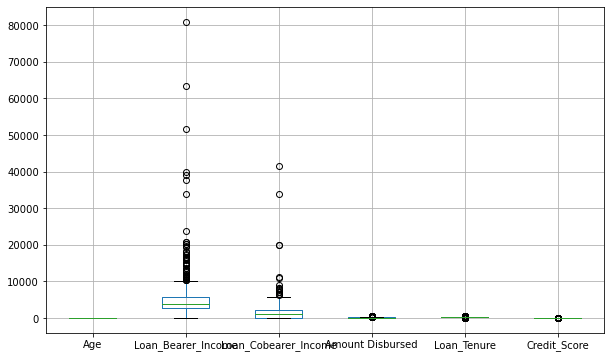

In [38]:
df.boxplot(figsize= (10,6))

#### Analysis:
    1. Loan_Bearer_Income,Loan_Cobearer_Income,Amount Disbursed are the continuous features that contain outliers
    2. Since Loan_Tenure and Credit_Score are considered as categorical features outliers are not considered
    3. There are no outliers in Age feature

In [39]:
df['No. of People in the Family'].value_counts()

0     345
1     102
2     101
3+     51
Name: No. of People in the Family, dtype: int64

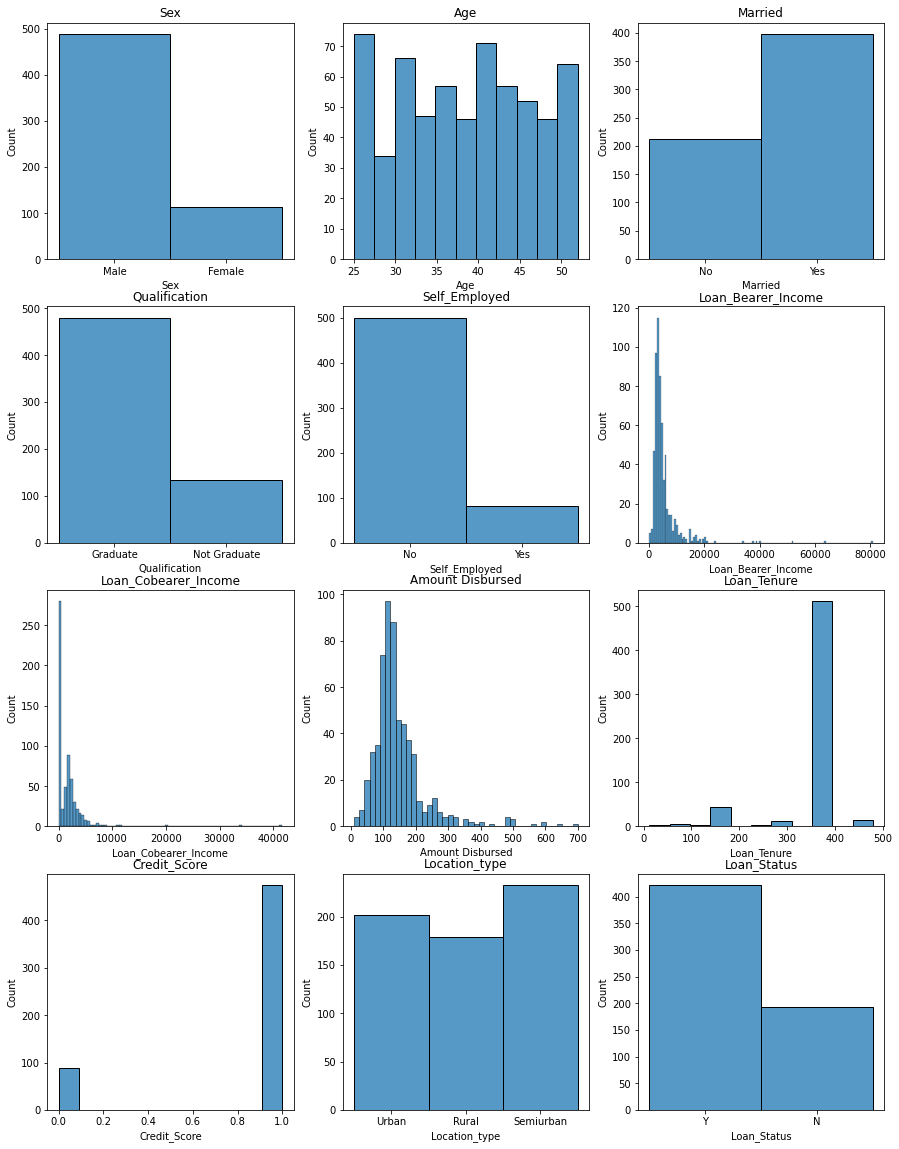

In [40]:
fig = plt.figure(figsize = (15,20))

ax = fig.add_subplot(4,3,1) 
sns.histplot(df['Sex'])
ax.title.set_text('Sex')


ax = fig.add_subplot(4,3,2)
sns.histplot(df['Age'])
ax.title.set_text('Age')

ax = fig.add_subplot(4,3,3) 
sns.histplot(df['Married'])
ax.title.set_text('Married')

ax = fig.add_subplot(4,3,4)
sns.histplot(df['Qualification'])
ax.title.set_text('Qualification')

ax = fig.add_subplot(4,3,5)
sns.histplot(df['Self_Employed'])
ax.title.set_text('Self_Employed')

ax = fig.add_subplot(4,3,6)
sns.histplot(df['Loan_Bearer_Income'])
ax.title.set_text('Loan_Bearer_Income')

ax = fig.add_subplot(4,3,7)
sns.histplot(df['Loan_Cobearer_Income'])
ax.title.set_text('Loan_Cobearer_Income')

ax = fig.add_subplot(4,3,8)
sns.histplot(df['Amount Disbursed'])
ax.title.set_text('Amount Disbursed')

ax = fig.add_subplot(4,3,9)
sns.histplot(df['Loan_Tenure'])
ax.title.set_text('Loan_Tenure')

ax = fig.add_subplot(4,3,10)
sns.histplot(df['Credit_Score'])
ax.title.set_text('Credit_Score')

ax = fig.add_subplot(4,3,11)
sns.histplot(df['Location_type'])
ax.title.set_text('Location_type')

ax = fig.add_subplot(4,3,12)
sns.histplot(df['Loan_Status'])
ax.title.set_text('Loan_Status') 

plt.show()

#### Analysis:
    1. None of the categorical features contain any outliers
    2. Loan_Bearer_Income,Loan_Cobearer_Income,Amount Disbursed have right tailed skewness or are positively skewed

In [41]:
for i in num_df2.columns:
    Q1 = num_df2[i].quantile(0.25)
    Q3 = num_df2[i].quantile(0.75)
    IQR = Q3-Q1
    upper_whisker = Q3 + IQR *1.5
    lower_whisker = Q1 - IQR *1.5
    print(f'{i} has {len((num_df2.loc[(num_df2[i]< lower_whisker) | (num_df2[i]> upper_whisker)]))} outliers')

Age has 0 outliers
Loan_Bearer_Income has 50 outliers
Loan_Cobearer_Income has 18 outliers
Amount Disbursed has 41 outliers


#### Applying log transformation

In [42]:
num_df = df[['Age','Loan_Bearer_Income','Loan_Cobearer_Income','Amount Disbursed']]
cat_df = df[['Sex','Married','No. of People in the Family','Qualification','Self_Employed','Loan_Tenure',
             'Credit_Score','Location_type','Loan_Status']]

In [43]:
for i in ['Loan_Bearer_Income','Loan_Cobearer_Income','Amount Disbursed']:   
    num_df2[i] = np.log(num_df2[i])       

In [44]:
for i in num_df2.columns:
    Q1 = num_df2[i].quantile(0.25)
    Q3 = num_df2[i].quantile(0.75)
    IQR = Q3-Q1
    upper_whisker = Q3 + IQR *1.5
    lower_whisker = Q1 - IQR *1.5
    print(f'{i} has {len((num_df2.loc[(num_df2[i]< lower_whisker) | (num_df2[i]> upper_whisker)]))} outliers')

Age has 0 outliers
Loan_Bearer_Income has 3 outliers
Loan_Cobearer_Income has 9 outliers
Amount Disbursed has 0 outliers


<AxesSubplot:xlabel='Loan_Bearer_Income', ylabel='Count'>

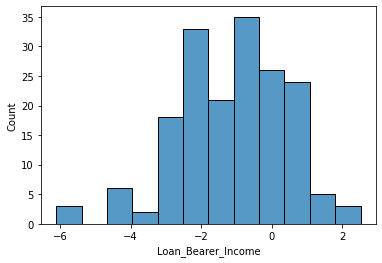

In [45]:
sns.histplot(num_df2['Loan_Bearer_Income'])

## Multicollinearity test

### Stage 1: Correlation heatmap

<AxesSubplot:>

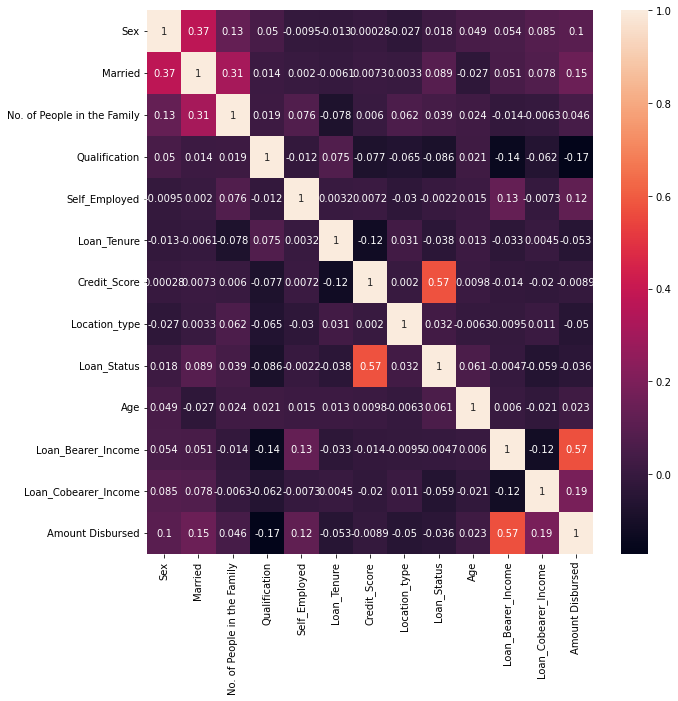

In [46]:
corr = df2.corr()
plt.subplots(figsize = (10,10))
sns.heatmap(corr,annot=True)

#### Analysis:
1. Married and Sex has 36% correlation
2. Married and No. of People in the Family has 33% correlation
3. Loan_Bearer_Income and Amount Disbursed has 57% correlation

-Conclusion: Some features have correlation greater than 30%. So we can conclude collinearity exists as stage 1 results

### Stage 2: Variance Inflation Factor(VIF)

In [47]:
def VIF(features):
    vif = pd.DataFrame()
    vif['VIF Score'] = [variance_inflation_factor(features.values,i) for i in range(features.shape[1])]
    vif['Features']  = features.columns
    vif.sort_values(by=['VIF Score'],ascending= False,inplace=True)
    return vif

In [48]:
df2.columns

Index(['Sex', 'Married', 'No. of People in the Family', 'Qualification',
       'Self_Employed', 'Loan_Tenure', 'Credit_Score', 'Location_type',
       'Loan_Status', 'Age', 'Loan_Bearer_Income', 'Loan_Cobearer_Income',
       'Amount Disbursed'],
      dtype='object')

In [49]:
VIF(df2.drop('Loan_Status',axis=1))

,VIF Score,Features
0,5.059773,Sex
6,3.964976,Credit_Score
1,3.630081,Married
7,2.419890,Location_type
11,1.714349,Amount Disbursed
9,1.641956,Loan_Bearer_Income
2,1.639878,No. of People in the Family
3,1.317409,Qualification
4,1.190170,Self_Employed
10,1.136278,Loan_Cobearer_Income


#### Analysis:
    Loan_Tenure,Credit_Score,Sex have VIF greater than 5 so we can conclude multicollinearity exists as per stage 2 results

### Correlation with target feature

In [50]:
def cwt(data,t_col):
    independent_variables = data.drop(t_col,axis = 1).columns
    corr_result =[]
    for col in independent_variables:
        corr_result.append(data[t_col].corr(data[col]))
    result = pd.DataFrame([independent_variables,corr_result],index=['Independent_variables','Correlation']).T
    return result.sort_values(by= ['Correlation'])

In [51]:
cwt(df2,'Loan_Status')

,Independent_variables,Correlation
3,Qualification,-0.085884
10,Loan_Cobearer_Income,-0.059187
5,Loan_Tenure,-0.038443
11,Amount Disbursed,-0.035877
9,Loan_Bearer_Income,-0.00471
4,Self_Employed,-0.002172
0,Sex,0.018301
7,Location_type,0.032112
2,No. of People in the Family,0.038699
8,Age,0.061043


#### Analysis:
    Only Credit_Score is highly correlated with Loan_Status(54%)

## Applying PCA to treat multicollinearity

In [52]:
def pca_func(X):
    n_comp = len(X.columns)
    pcs =1
    # Feature scaling
    X = StandardScaler().fit_transform(X)
    
    # Applying PCA
    for i in range(1,n_comp):
        pca = PCA(n_components=i)
        p_comp = pca.fit_transform(X)
        evr = np.cumsum(pca.explained_variance_ratio_)
        if(evr[i-1]>0.9):
            pcs = i
            break
            
    print('Explained variance ratio after PCA is:',evr)
#creating dataframe using principal components
    col = []
    for j in range(1,pcs+1):
        col.append('PC_'+str(j))
    pca_df = pd.DataFrame(data=p_comp,columns=col)   
    return pca_df

In [53]:
pca_df2 = pca_func(df2.drop('Loan_Status',axis=1))

Explained variance ratio after PCA is: [0.15163306 0.27528637 0.37257848 0.46532201 0.55277256 0.63616261
 0.71718654 0.79182896 0.86027046 0.9243627 ]


In [54]:
pca_df2.head()

,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,PC_8,PC_9,PC_10
0,-0.834936,0.792506,-0.792504,0.321334,0.782684,-0.098220,-0.784620,0.461890,-0.544465,-0.914622
1,0.472109,-0.784703,-0.516708,-0.087955,-0.958005,-0.703048,-0.299091,0.217193,1.092875,0.247040
2,-0.007045,-0.205681,-0.598066,-0.601894,1.224143,-0.878806,1.420819,1.270236,-0.236841,-2.134968
3,-0.570727,-1.239984,0.068727,0.345328,0.178985,-0.405157,-0.458376,0.591874,-2.095265,-0.100012
4,-0.546004,0.873744,-0.548985,-0.121881,0.609614,1.624201,-0.702742,0.132281,-0.469711,-0.779567


### Joining PCA feature with target feature

In [55]:
transformed_df2 = pca_df2.join(df2['Loan_Status'])

In [56]:
transformed_df2.head()

,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,PC_8,PC_9,PC_10,Loan_Status
0,-0.834936,0.792506,-0.792504,0.321334,0.782684,-0.098220,-0.784620,0.461890,-0.544465,-0.914622,1.0
1,0.472109,-0.784703,-0.516708,-0.087955,-0.958005,-0.703048,-0.299091,0.217193,1.092875,0.247040,0.0
2,-0.007045,-0.205681,-0.598066,-0.601894,1.224143,-0.878806,1.420819,1.270236,-0.236841,-2.134968,1.0
3,-0.570727,-1.239984,0.068727,0.345328,0.178985,-0.405157,-0.458376,0.591874,-2.095265,-0.100012,1.0
4,-0.546004,0.873744,-0.548985,-0.121881,0.609614,1.624201,-0.702742,0.132281,-0.469711,-0.779567,1.0


## Model Building - Machine Learning models

### Train test split

In [57]:
def train_and_test_split(data,y,test_size=0.2,random_state=10):
    X = data.drop(y,1)
    return train_test_split(X,data[y],test_size=test_size,random_state=random_state,shuffle=True,stratify=data[y])

In [58]:
def model_builder(model_name,estimator,data,t_col):
    X_train,X_test,y_train,y_test = train_and_test_split(data,t_col)
    estimator.fit(X_train,y_train)
    y_pred = estimator.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    fscore = f1_score(y_test,y_pred)
    return model_name,accuracy,fscore

### Building multiple models

In [59]:
def multiple_models(data,data1,t_col):
    col = ['Model_Name','Accuracy_Score','F1_Score']
    result = pd.DataFrame(columns=col)
    
    # Adding values to result dataframe
    result.loc[len(result)] = model_builder('Logistic regression',LogisticRegression(),data1,t_col)
    result.loc[len(result)] = model_builder('Decision Tree classifer',DecisionTreeClassifier(),data,t_col)
    result.loc[len(result)] = model_builder('Gaussian Naive Bayes',GaussianNB(),data1,t_col)
    result.loc[len(result)] = model_builder('Support Vector classifer',SVC(),data1,t_col)
    result.loc[len(result)] = model_builder('K Neighbors classifer',KNeighborsClassifier(),data1,t_col)
    result.loc[len(result)] = model_builder('Random Forest classifer',RandomForestClassifier(),data,t_col)
    result.loc[len(result)] = model_builder('Adaboost classifer',AdaBoostClassifier(),data,t_col)
    result.loc[len(result)] = model_builder('Gradient Boost classifer',GradientBoostingClassifier(),data,t_col)
    result.loc[len(result)] = model_builder('XGBoost classifer',XGBClassifier(verbosity = 0),data,t_col)
    
    return result.sort_values(by=['F1_Score'],ascending=False,ignore_index=True)

In [60]:
multiple_models(df2,transformed_df2,'Loan_Status')

,Model_Name,Accuracy_Score,F1_Score
0,Random Forest classifer,0.845528,0.897297
1,Logistic regression,0.829268,0.888889
2,Support Vector classifer,0.821138,0.884211
3,Adaboost classifer,0.813008,0.870056
4,Gradient Boost classifer,0.804878,0.868132
5,K Neighbors classifer,0.796748,0.864865
6,XGBoost classifer,0.788618,0.850575
7,Gaussian Naive Bayes,0.764228,0.839779
8,Decision Tree classifer,0.723577,0.792683


## Cross Validation

In [61]:
def kfold_cv(data,data1,t_col,cv=10):
    model_names = [LogisticRegression(),SVC(),KNeighborsClassifier(),GaussianNB(),DecisionTreeClassifier(),
                   RandomForestClassifier(),AdaBoostClassifier(),GradientBoostingClassifier(),
                   XGBClassifier(verbosity = 0)]
    accscores = ['Score_LR','Score_SVC','Score_KNC','Score_GNB','Score_DTC','Score_RFC',
             'Score_ABC','Score_GBC','Score_XGBC']
    fscores = ['Score_LR','Score_SVC','Score_KNC','Score_GNB','Score_DTC','Score_RFC',
             'Score_ABC','Score_GBC','Score_XGBC']
    stf = StratifiedKFold(n_splits=10,shuffle=True,random_state=42)
    
    for model,i in zip(model_names,range(len(accscores))):
        if(i<=2):
            accscores[i] = (cross_val_score(estimator=model,X=data1.drop(t_col,1),y=data1[t_col],cv=stf))
            fscores[i] = (cross_val_score(estimator=model,X=data1.drop(t_col,1),y=data1[t_col],cv=stf,scoring='f1'))
        else:
            accscores[i] = (cross_val_score(estimator=model,X=data.drop(t_col,1),y=data[t_col],cv=stf))
            fscores[i] = (cross_val_score(estimator=model,X=data.drop(t_col,1),y=data[t_col],cv=stf,scoring='f1'))
            
    
    result = []
    for i in range(len(model_names)):
        accscore_mean = np.mean(accscores[i])
        accscore_std = np.std(accscores[i])
        fscore_mean = np.mean(fscores[i])
        fscore_std = np.std(fscores[i])
        model_name = type(model_names[i]).__name__
        temp = [model_name,accscore_mean,accscore_std,fscore_mean,fscore_std]
        result.append(temp)
    
    result_df = pd.DataFrame(result,columns=['Model Name','Accuracy Score','Accuracy Std Dev','F1 Score','F1 Std Dev'])
    return result_df.sort_values(by=['F1 Score'],ascending=False,ignore_index=True)

In [62]:
kfold_cv(df2,transformed_df2,'Loan_Status')

,Model Name,Accuracy Score,Accuracy Std Dev,F1 Score,F1 Std Dev
0,LogisticRegression,0.827393,0.030130,0.886429,0.018699
1,SVC,0.824141,0.023721,0.885318,0.013546
2,RandomForestClassifier,0.824141,0.026810,0.881919,0.013954
3,AdaBoostClassifier,0.811132,0.033347,0.872362,0.023529
4,GradientBoostingClassifier,0.809492,0.037688,0.870129,0.025413
5,GaussianNB,0.806240,0.035159,0.869574,0.023565
6,XGBClassifier,0.807774,0.035832,0.866837,0.024336
7,KNeighborsClassifier,0.783395,0.030011,0.855733,0.020472
8,DecisionTreeClassifier,0.734585,0.022252,0.791233,0.029163


## Hyperparameter tuning

In [63]:
def tuning(X,y,X1,y1,cv=10):
    # Creating the parameter grid
    
    param_knn = {'n_neighbors':[1,2,3,4,5,6,7,8,9,10,20,30],'leaf_size':[1,2,3,4,5,6,7,8,9,10,20,30,40,50],'p':[1,2]}
    param_dtc = {'max_depth':[2, 3, 5, 10, 20],'min_samples_leaf':[5, 10, 20, 50, 100],
                 'criterion':["gini", "entropy"]}
    param_adb = {'learning_rate':[0.0001,0.001,0.01,0.1,1],'n_estimators': [10, 50, 100, 500]}
    param_svc = {'C': [0.1, 1, 10, 100, 1000],'gamma': [1, 0.1, 0.01, 0.001, 0.0001]}

    param_gboost = {"n_estimators":[5,50,250,500],"max_depth":[1,3,5,7,9],"learning_rate":[0.01,0.1,1,10,100]}
    param_xgb = {'learning_rate': [0.001,0.01,0.1,1],'reg_alpha': [0.1,0.3,0.5,0.7,0.9,1],
                 'reg_lambda': [0.1,0.3,0.5,0.7,0.9,1]}
    param_rf = {'n_estimators':[50,100,150,200,250,300],
               'criterion':["gini", "entropy"]}
    param_gnb = {'var_smoothing': np.logspace(0,-9, num=100)}
    
    # Hyperparameter tuning
    stf = StratifiedKFold(n_splits=10,shuffle=True,random_state=42)
    tune_knn = RandomizedSearchCV(KNeighborsClassifier(),param_knn,cv=stf)  
    tune_dtc = RandomizedSearchCV(DecisionTreeClassifier(),param_dtc,cv=stf)    
    tune_adb = RandomizedSearchCV(AdaBoostClassifier(),param_adb,cv=stf)    
    tune_svc = RandomizedSearchCV(SVC(),param_svc,cv=stf)    
    tune_gboost = RandomizedSearchCV(GradientBoostingClassifier(),param_gboost,cv=stf)    
    tune_xgb = RandomizedSearchCV(XGBClassifier(),param_xgb,cv=stf)    
    tune_rf = RandomizedSearchCV(RandomForestClassifier(),param_rf,cv=stf) 
    tune_gnb = RandomizedSearchCV(GaussianNB(),param_gnb,cv=stf) 
    
    
    # Model fitting
    tune_models = [tune_knn,tune_dtc,tune_gnb,tune_adb,tune_svc,tune_gboost,tune_xgb,tune_rf]
    models = ['KNN','DTC','GNB','ADB','SVC','GBoost','XGB','RF']
    for i in range(len(tune_models)):
        if(i<=0):
            tune_models[i].fit(X1,y1)
        else:
            tune_models[i].fit(X,y)
        
    for i in range(len(tune_models)):
        print('Model: ',models[i])
        print('Best parameters: ',tune_models[i].best_params_)

In [64]:
tuning(df2.drop('Loan_Status',axis=1),df2['Loan_Status'],transformed_df2.drop('Loan_Status',axis=1),transformed_df2['Loan_Status'])

Model:  KNN
Best parameters:  {'p': 1, 'n_neighbors': 20, 'leaf_size': 30}
Model:  DTC
Best parameters:  {'min_samples_leaf': 50, 'max_depth': 5, 'criterion': 'gini'}
Model:  GNB
Best parameters:  {'var_smoothing': 2.310129700083158e-09}
Model:  ADB
Best parameters:  {'n_estimators': 50, 'learning_rate': 0.01}
Model:  SVC
Best parameters:  {'gamma': 0.001, 'C': 100}
Model:  GBoost
Best parameters:  {'n_estimators': 5, 'max_depth': 1, 'learning_rate': 1}
Model:  XGB
Best parameters:  {'reg_lambda': 0.9, 'reg_alpha': 1, 'learning_rate': 0.01}
Model:  RF
Best parameters:  {'n_estimators': 100, 'criterion': 'entropy'}


In [65]:
def CV_post_hpt(X,y,X1,y1,cv=10):
    stf = StratifiedKFold(n_splits=10,shuffle=True,random_state=42)
    accscore_lr = cross_val_score(LogisticRegression(),X1,y1,cv=stf)
    accscore_knn = cross_val_score(KNeighborsClassifier(n_neighbors=7,leaf_size=9,p=1),X1,y1,cv=stf)
    accscore_dtc = cross_val_score(DecisionTreeClassifier(criterion='entropy',min_samples_leaf=50,
                                                       max_depth=20),X,y,cv=stf)
    accscore_svc = cross_val_score(SVC(C=1,gamma=0.01),X1,y1,cv=stf)
    accscore_rf = cross_val_score(RandomForestClassifier(n_estimators=250,criterion='entropy'),X,y,cv=stf)
    accscore_adb = cross_val_score(AdaBoostClassifier(learning_rate=0.01,n_estimators=10),X,y,cv=stf)
    accscore_gboost = cross_val_score(GradientBoostingClassifier(n_estimators=5,max_depth=1,learning_rate=1),X,y,cv=stf)
    accscore_xgb = cross_val_score(XGBClassifier(learning_rate=0.001,reg_alpha=0.9,reg_lambda=0.1),X,y,cv=stf)
    accscore_gnb = cross_val_score(GaussianNB(var_smoothing=1.519911082952933e-06),X,y,cv=stf)
    
    fscore_lr = cross_val_score(LogisticRegression(),X1,y1,cv=stf,scoring='f1')
    fscore_knn = cross_val_score(KNeighborsClassifier(n_neighbors=7,leaf_size=9,p=1),X1,y1,cv=stf,scoring='f1')
    fscore_dtc = cross_val_score(DecisionTreeClassifier(criterion='entropy',min_samples_leaf=50,
                                                       max_depth=20),X,y,cv=stf,scoring='f1')
    fscore_svc = cross_val_score(SVC(C=1,gamma=0.01),X1,y1,cv=stf,scoring='f1')
    fscore_rf = cross_val_score(RandomForestClassifier(n_estimators=250,criterion='entropy'),X,y,cv=stf,scoring='f1')
    fscore_adb = cross_val_score(AdaBoostClassifier(learning_rate=0.01,n_estimators=10),X,y,cv=stf,scoring='f1')
    fscore_gboost = cross_val_score(GradientBoostingClassifier(n_estimators=5,max_depth=1,learning_rate=1),X,y,cv=stf,
                                    scoring='f1')
    fscore_xgb = cross_val_score(XGBClassifier(learning_rate=0.001,reg_alpha=0.9,reg_lambda=0.1),X,y,cv=stf,
                                 scoring='f1')
    fscore_gnb = cross_val_score(GaussianNB(var_smoothing=1.519911082952933e-06),X,y,cv=stf,scoring='f1')
    
    
    model_names = ['Logistic Regression','K Neighbors Classifier','Decision Tree Classifier',
                   'Support Vector Classifier','Random Forest Classifier','AdaBoost Classifier',
                   'Gradient Boosting Classifier','XGB Classifier','Gaussian Naive Bayes']
    accscores = [accscore_lr,accscore_knn,accscore_dtc,accscore_svc,accscore_rf,accscore_adb,accscore_gboost,
                 accscore_xgb,accscore_gnb]
    fscores = [fscore_lr,fscore_knn,fscore_dtc,fscore_svc,fscore_rf,fscore_adb,fscore_gboost,
                 fscore_xgb,fscore_gnb]
    
    result = []
    for i in range(len(model_names)):
        accscore_mean = np.mean(accscores[i])
        accscore_std = np.std(accscores[i])
        fscore_mean = np.mean(fscores[i])
        fscore_std = np.std(fscores[i])
        m_name = model_names[i]
        temp = [m_name,accscore_mean,accscore_std,fscore_mean,fscore_std]
        result.append(temp)
    result_df = pd.DataFrame(result,columns=['Model Name','Accuracy Score','Accuracy Std Dev','F1 Score','F1 Std Dev'])
    return result_df.sort_values(by='F1 Score',ascending=False,ignore_index=True)

In [66]:
CV_post_hpt(df2.drop('Loan_Status',axis=1),df2['Loan_Status'],transformed_df2.drop('Loan_Status',axis=1),transformed_df2['Loan_Status'])

,Model Name,Accuracy Score,Accuracy Std Dev,F1 Score,F1 Std Dev
0,Decision Tree Classifier,0.830645,0.025343,0.888822,0.015238
1,AdaBoost Classifier,0.830645,0.025343,0.888822,0.015238
2,Logistic Regression,0.827393,0.030130,0.886429,0.018699
3,Random Forest Classifier,0.815997,0.025120,0.882030,0.016442
4,Gradient Boosting Classifier,0.822501,0.033622,0.879983,0.021694
5,XGB Classifier,0.819223,0.044451,0.876805,0.029245
6,Support Vector Classifier,0.809413,0.020983,0.876525,0.012357
7,Gaussian Naive Bayes,0.806240,0.035159,0.869574,0.023565
8,K Neighbors Classifier,0.786594,0.028060,0.858946,0.018258


## Clustering

In [67]:
labels = KMeans(n_clusters = 2,random_state = 10)
cluster = labels.fit_predict(df2.drop('Loan_Status',axis=1))

In [68]:
def clustering(x,t_col,cluster):
    column = list(set(list(x.columns)) - set(x[t_col]))
    r = int(len(column)/2)
    if(r%2==0):
        r=r
    else:
        r+=1
    f,ax = plt.subplots(r,2,figsize=(20,18))
    a=0
    for row in range(r):
        for col in range(2):
            if(a!=len(column)):
                ax[row][col].scatter(x[t_col],x[column[a]],c=cluster)
                ax[row][col].set_xlabel(t_col)               
                ax[row][col].set_ylabel(column[a])               
                a+=1

In [69]:
X = df2.drop('Loan_Status',axis=1)

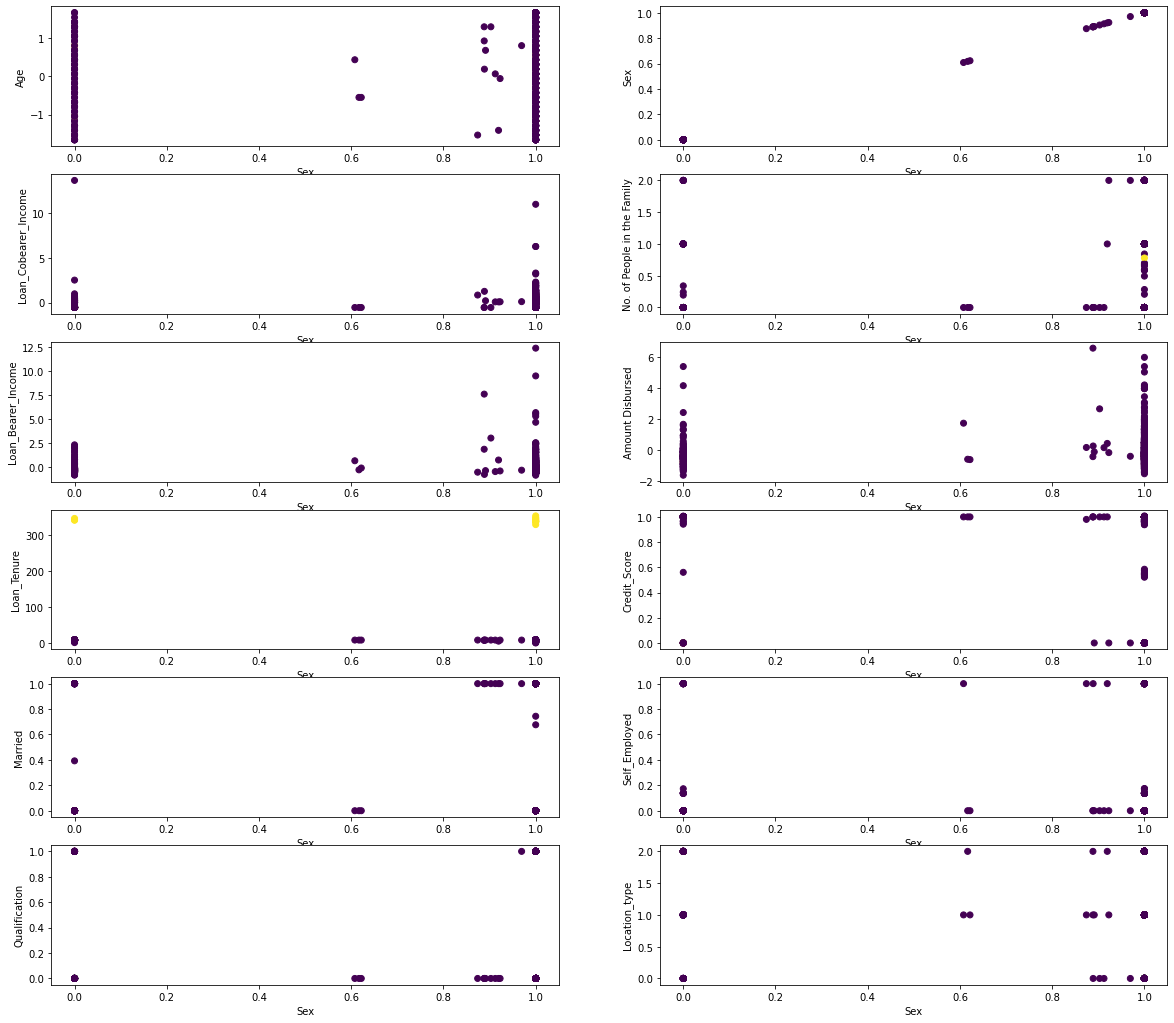

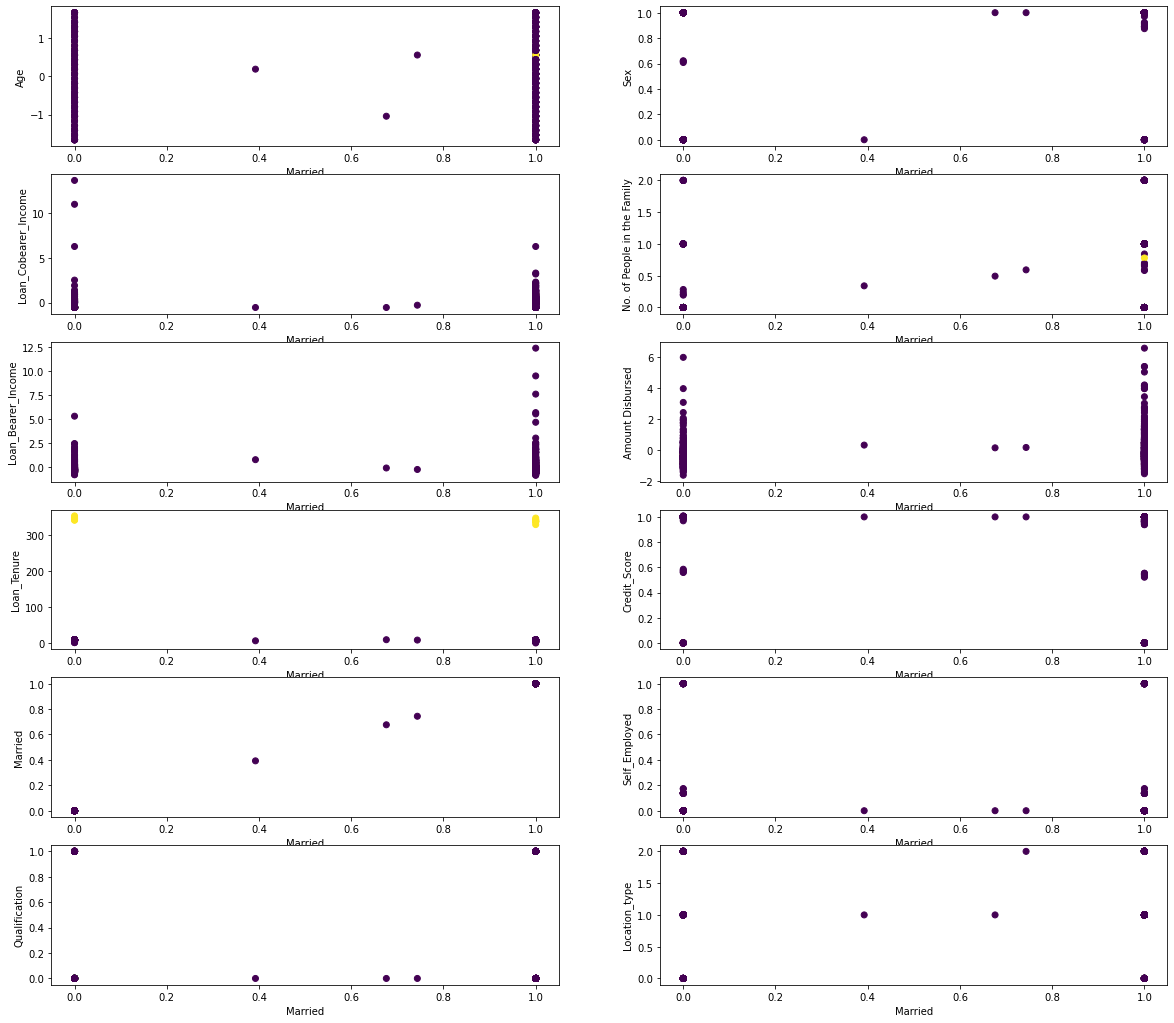

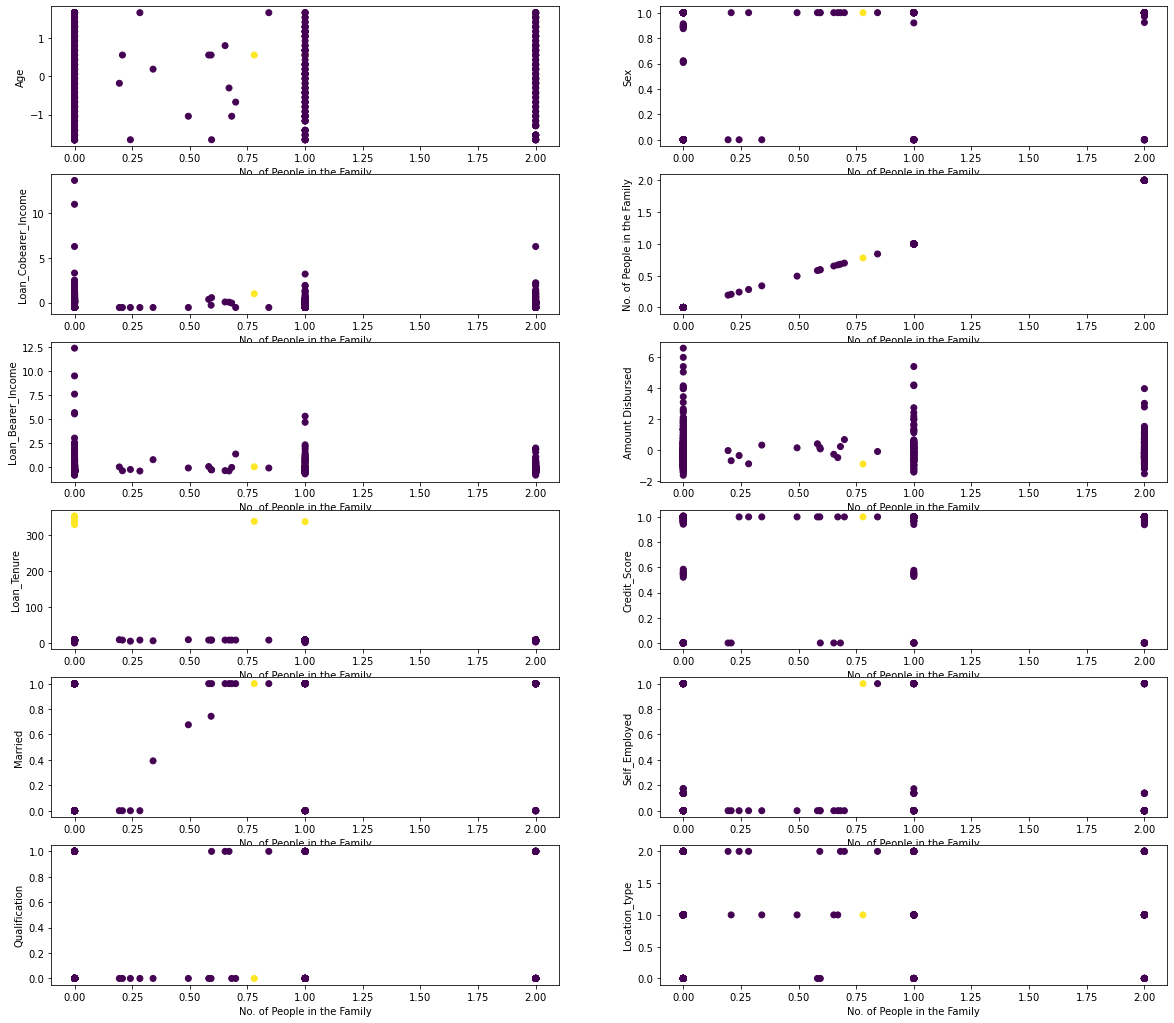

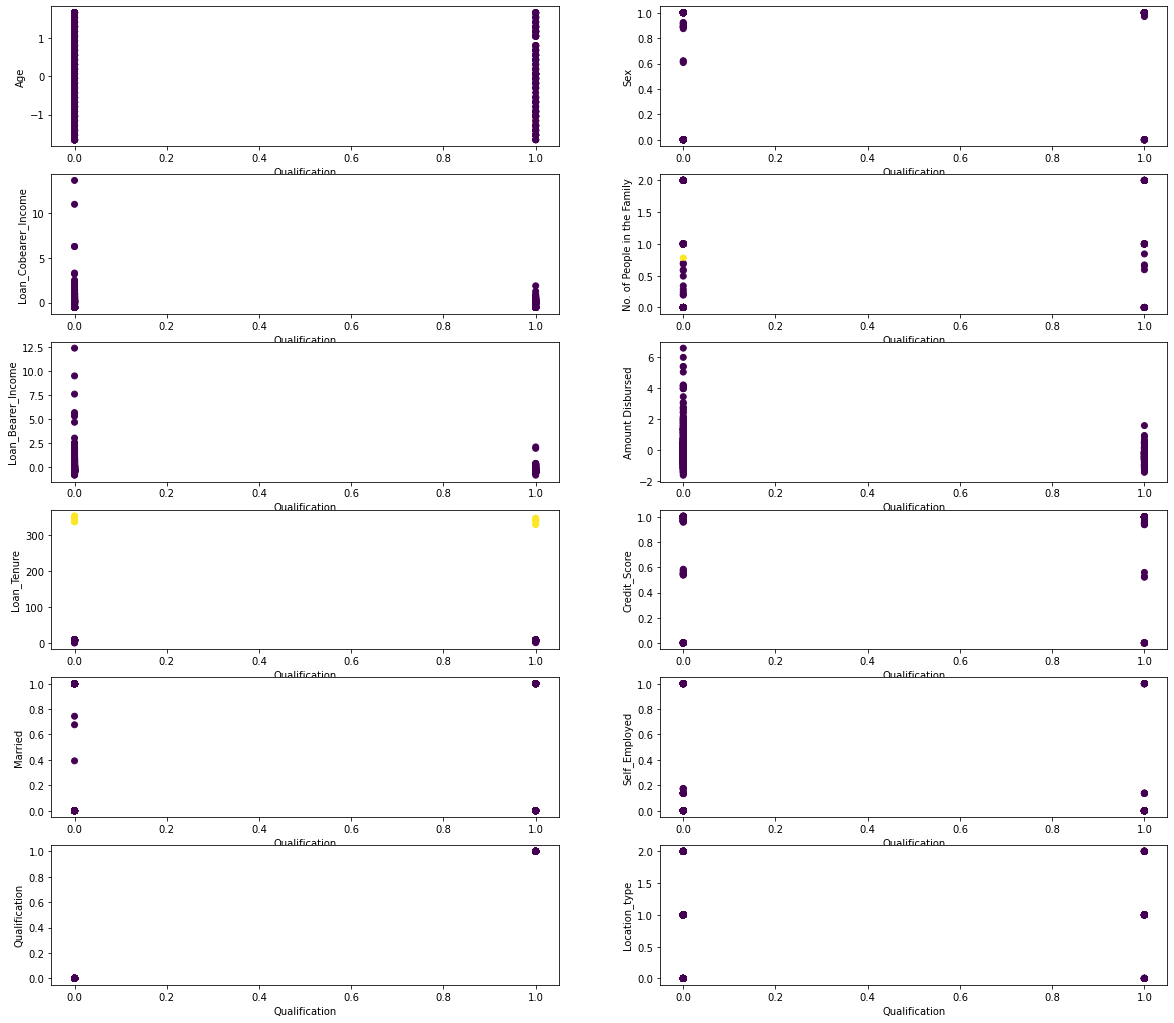

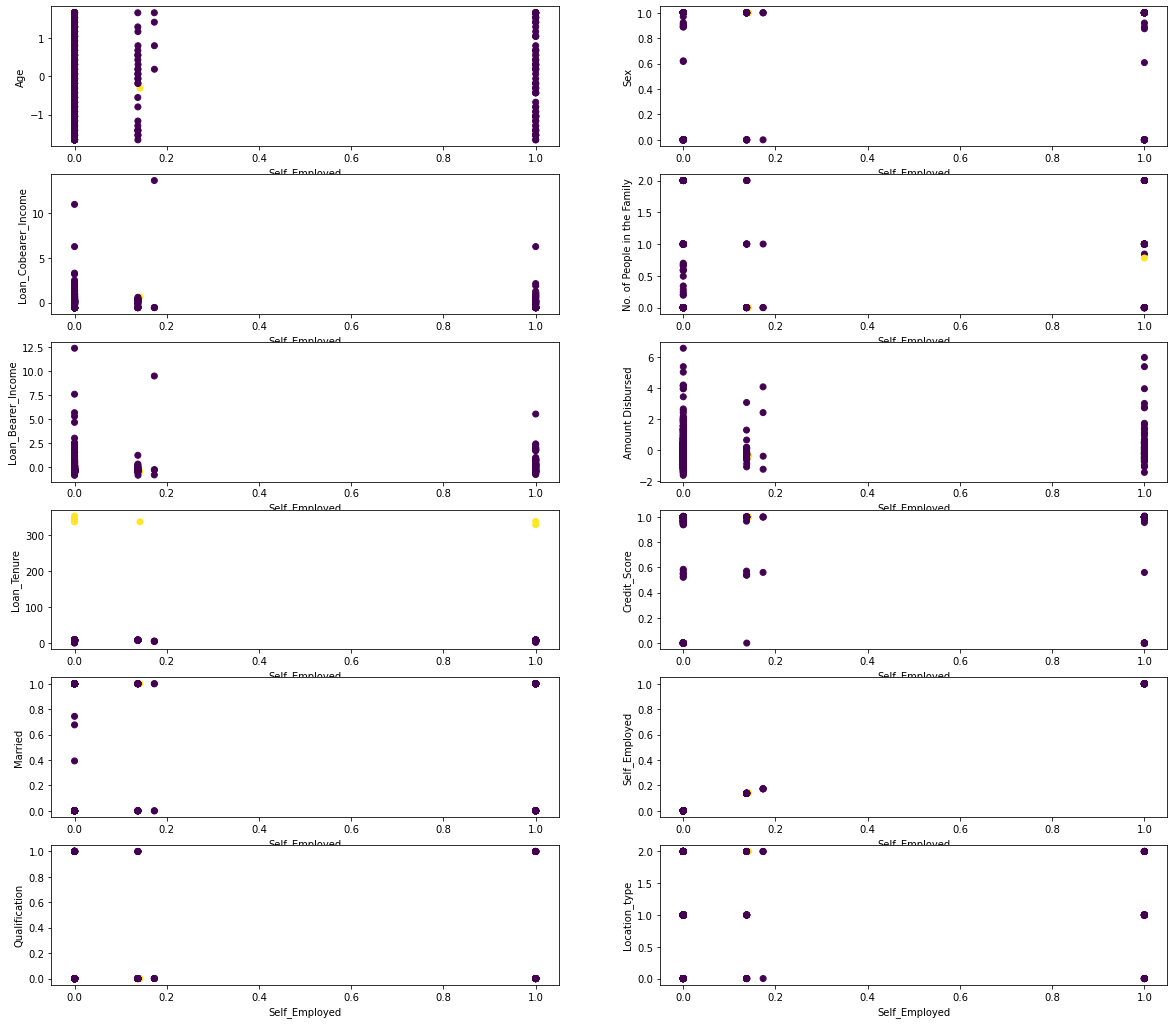

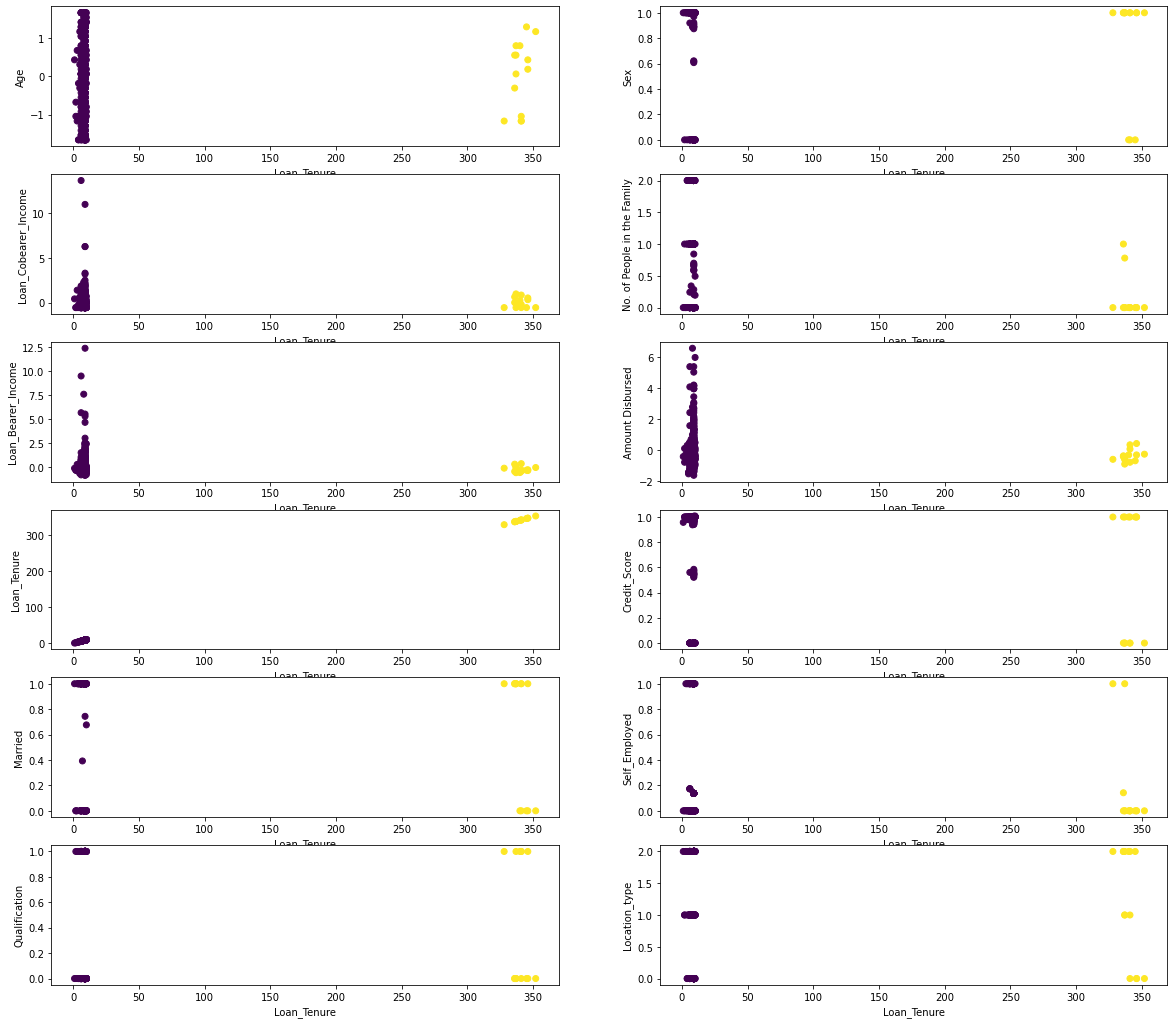

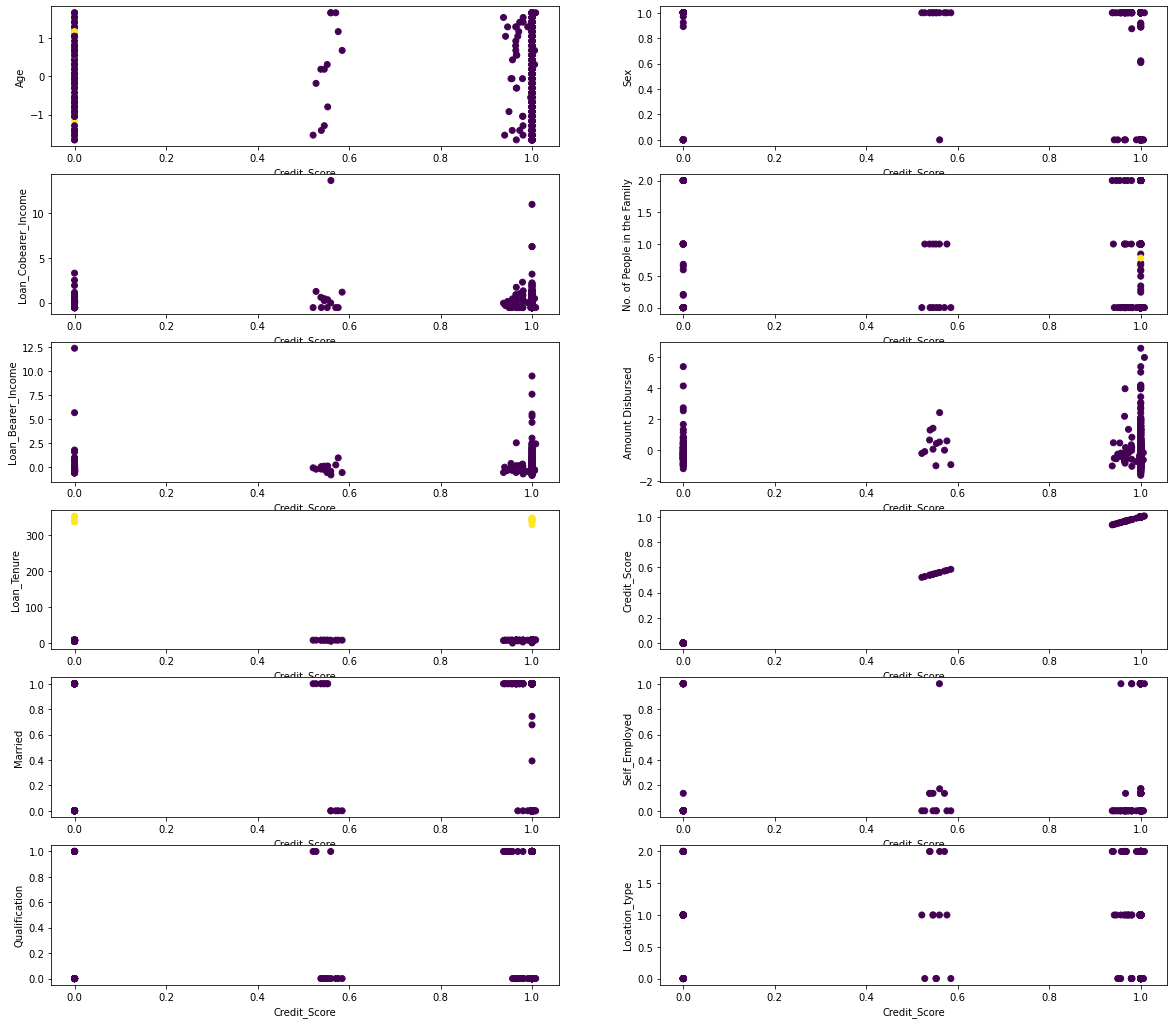

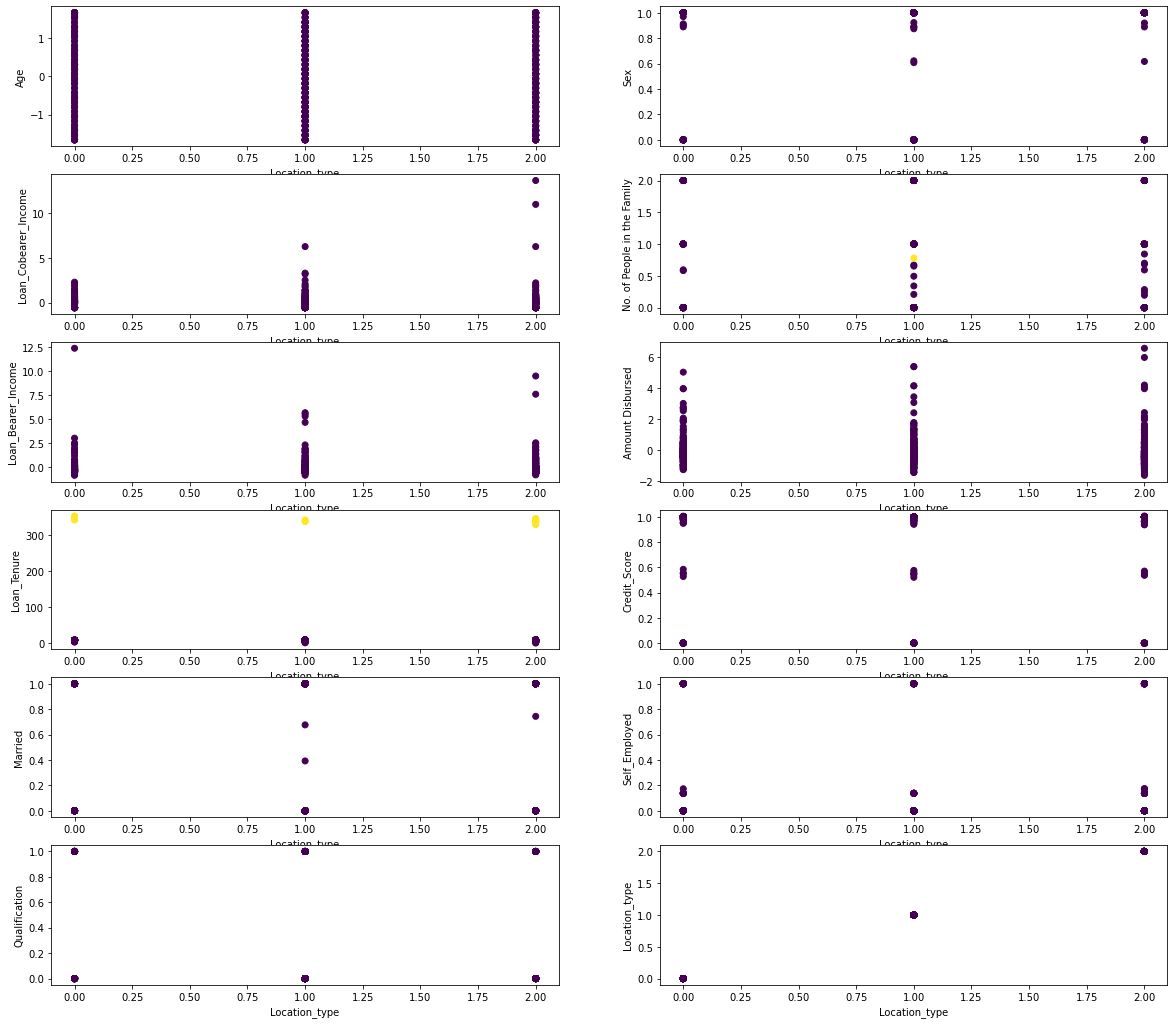

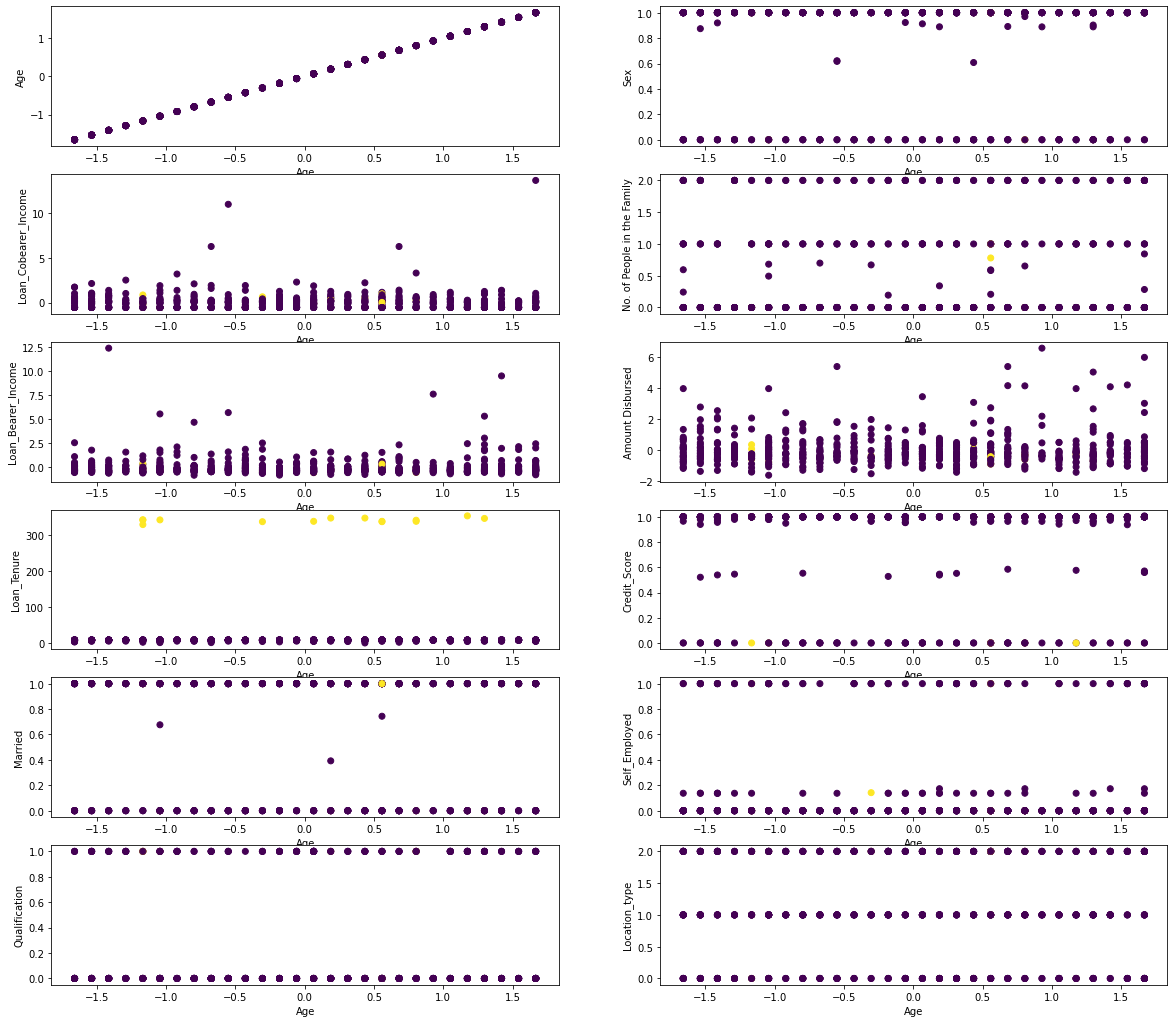

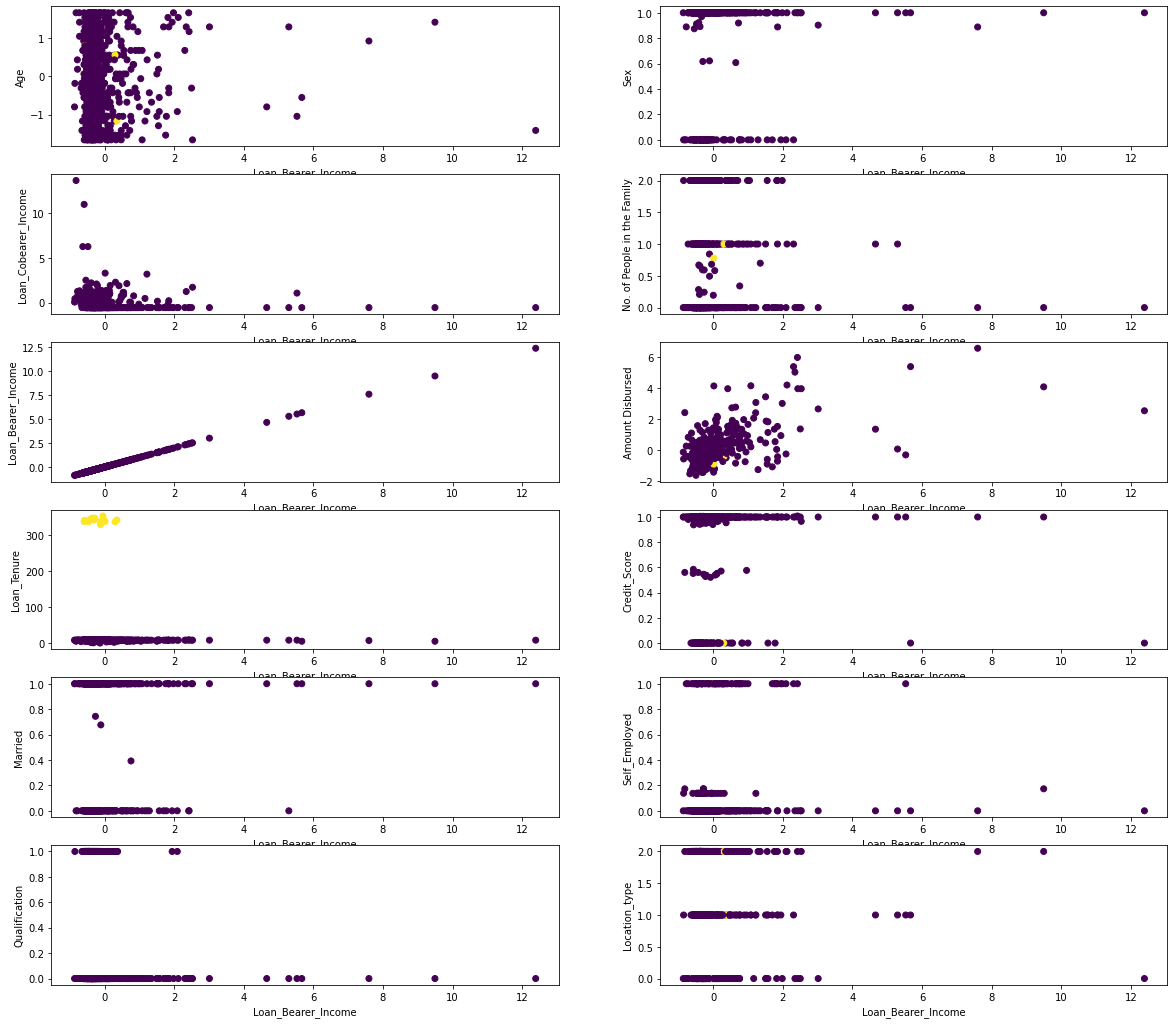

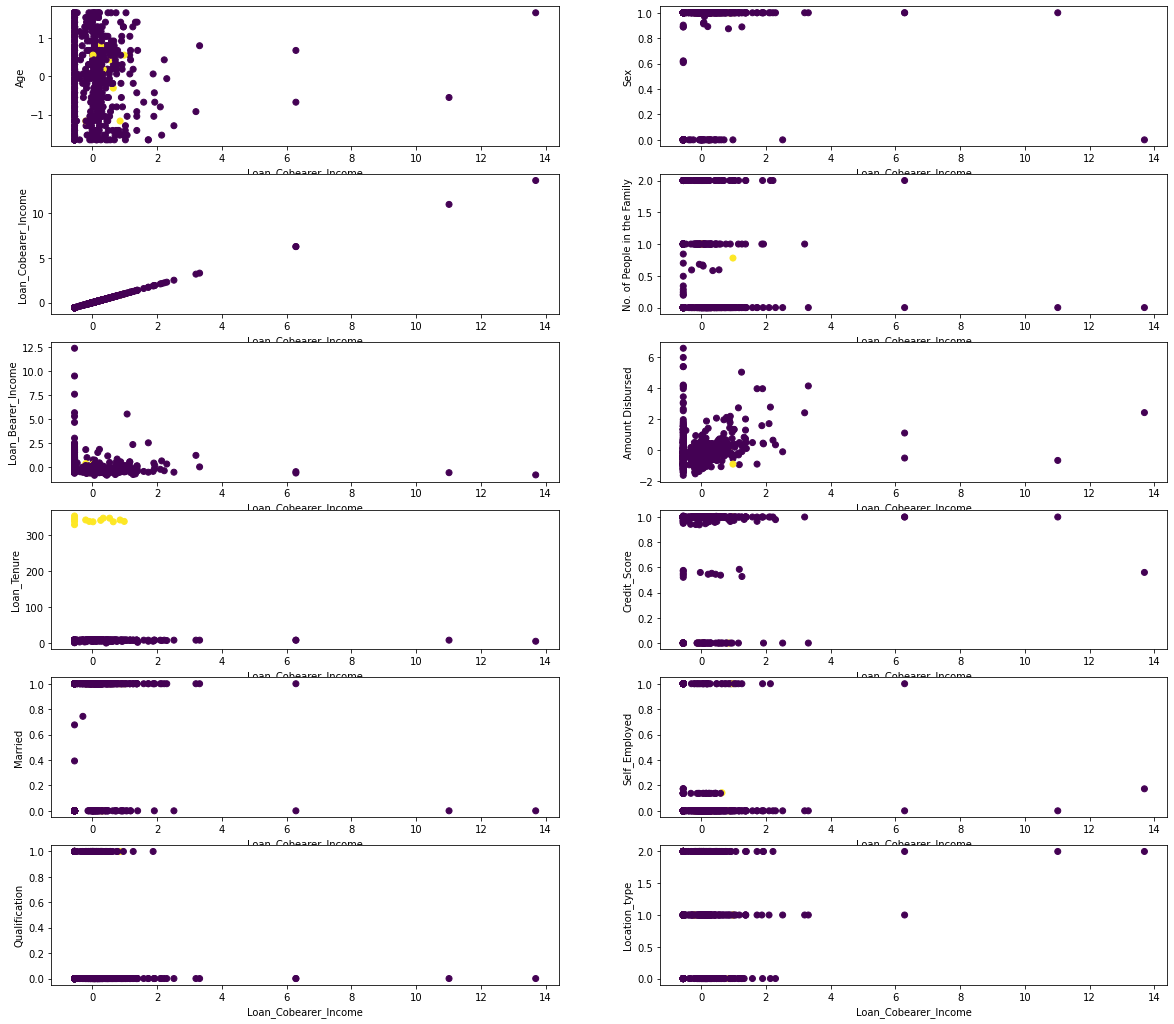

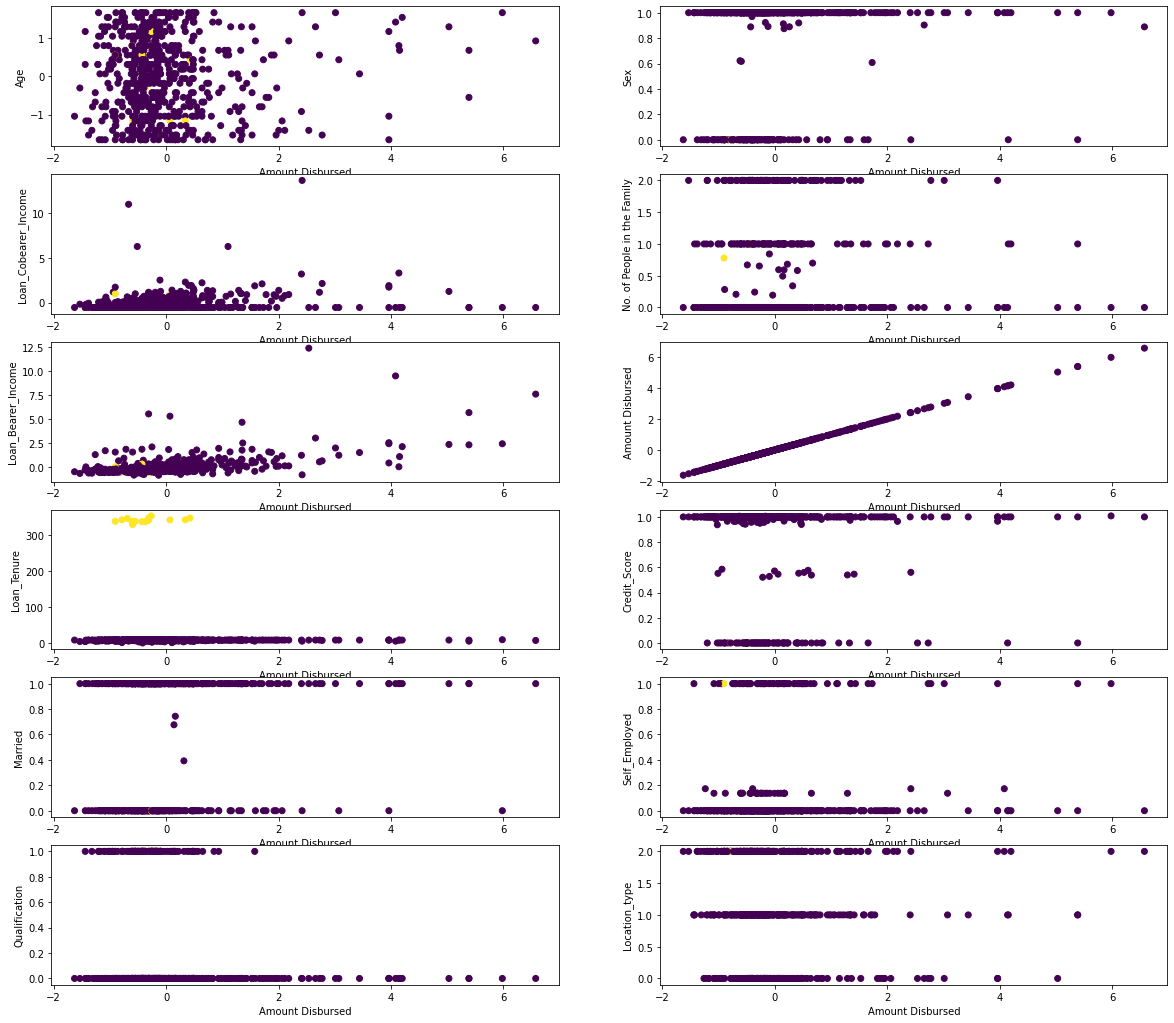

In [70]:
for col in X.columns:
    clustering(X,col,cluster)

#### Analysis:
    Loan_Tenure forms clusters with all features

In [71]:
new_df2 = df2.join(pd.DataFrame(cluster,columns=['clusters']),how='left')
new_df2.head()

,Sex,Married,No. of People in the Family,Qualification,Self_Employed,Loan_Tenure,Credit_Score,Location_type,Loan_Status,Age,Loan_Bearer_Income,Loan_Cobearer_Income,Amount Disbursed,clusters
0,1.0,0.0,0.0,0.0,0.0,9,1.0,2.0,1.0,-0.673686,0.072991,-0.554487,-0.453499,0
1,1.0,1.0,1.0,0.0,0.0,9,1.0,0.0,0.0,-0.550504,-0.134412,-0.038732,-0.216053,0
2,1.0,1.0,0.0,0.0,1.0,9,1.0,2.0,1.0,-0.920048,-0.393747,-0.554487,-0.952136,0
3,1.0,1.0,0.0,1.0,0.0,9,1.0,2.0,1.0,-0.673686,-0.462062,0.251980,-0.311031,0
4,1.0,0.0,0.0,0.0,0.0,9,1.0,2.0,1.0,1.174034,0.097728,-0.554487,-0.061713,0


In [72]:
temp_df2 = new_df2.groupby('clusters')['Loan_Status'].agg(['mean','median'])
temp_df2.head()

,mean,median
clusters,,
0,0.690000,1.0
1,0.571429,1.0


In [73]:
cluster_df2 = new_df2.merge(temp_df2,on= 'clusters',how='left')
cluster_df2.head()

,Sex,Married,No. of People in the Family,Qualification,Self_Employed,Loan_Tenure,Credit_Score,Location_type,Loan_Status,Age,Loan_Bearer_Income,Loan_Cobearer_Income,Amount Disbursed,clusters,mean,median
0,1.0,0.0,0.0,0.0,0.0,9,1.0,2.0,1.0,-0.673686,0.072991,-0.554487,-0.453499,0,0.69,1.0
1,1.0,1.0,1.0,0.0,0.0,9,1.0,0.0,0.0,-0.550504,-0.134412,-0.038732,-0.216053,0,0.69,1.0
2,1.0,1.0,0.0,0.0,1.0,9,1.0,2.0,1.0,-0.920048,-0.393747,-0.554487,-0.952136,0,0.69,1.0
3,1.0,1.0,0.0,1.0,0.0,9,1.0,2.0,1.0,-0.673686,-0.462062,0.251980,-0.311031,0,0.69,1.0
4,1.0,0.0,0.0,0.0,0.0,9,1.0,2.0,1.0,1.174034,0.097728,-0.554487,-0.061713,0,0.69,1.0


In [74]:
X = cluster_df2.drop(['Loan_Status','clusters'],axis=1)
y = cluster_df2['Loan_Status']

In [75]:
multiple_models(cluster_df2,cluster_df2,'Loan_Status')

,Model_Name,Accuracy_Score,F1_Score
0,Random Forest classifer,0.845528,0.897297
1,Logistic regression,0.821138,0.884211
2,Gaussian Naive Bayes,0.804878,0.872340
3,Adaboost classifer,0.813008,0.870056
4,Gradient Boost classifer,0.804878,0.868132
5,XGBoost classifer,0.788618,0.850575
6,K Neighbors classifer,0.747967,0.839378
7,Support Vector classifer,0.691057,0.817308
8,Decision Tree classifer,0.739837,0.804878


In [76]:
kfold_cv(cluster_df2,cluster_df2,'Loan_Status')

,Model Name,Accuracy Score,Accuracy Std Dev,F1 Score,F1 Std Dev
0,LogisticRegression,0.824141,0.024828,0.884757,0.015182
1,RandomForestClassifier,0.824088,0.025178,0.880625,0.016479
2,AdaBoostClassifier,0.811132,0.033347,0.872362,0.023529
3,GradientBoostingClassifier,0.807853,0.038275,0.870129,0.025413
4,GaussianNB,0.806214,0.033737,0.869782,0.022886
5,XGBClassifier,0.807774,0.035832,0.866837,0.024336
6,SVC,0.687308,0.005314,0.814668,0.003744
7,KNeighborsClassifier,0.711819,0.044891,0.812299,0.029225
8,DecisionTreeClassifier,0.733078,0.039231,0.807108,0.028020


In [77]:
CV_post_hpt(X,y,X,y)

,Model Name,Accuracy Score,Accuracy Std Dev,F1 Score,F1 Std Dev
0,Decision Tree Classifier,0.830645,0.025343,0.888822,0.015238
1,AdaBoost Classifier,0.830645,0.025343,0.888822,0.015238
2,Logistic Regression,0.824141,0.024828,0.884757,0.015182
3,Random Forest Classifier,0.824141,0.026810,0.880901,0.015576
4,Gradient Boosting Classifier,0.822501,0.033622,0.879983,0.021694
5,XGB Classifier,0.819223,0.044451,0.876805,0.029245
6,Support Vector Classifier,0.799630,0.021034,0.870990,0.012532
7,Gaussian Naive Bayes,0.806240,0.035159,0.869574,0.023565
8,K Neighbors Classifier,0.732972,0.035927,0.829404,0.023834


## Feature importance using XGBoost

In [78]:
X_train,X_test,y_train,y_test = train_and_test_split(cluster_df2.drop('clusters',axis=1),'Loan_Status')

In [79]:
xgb = XGBClassifier()

In [80]:
xgb.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

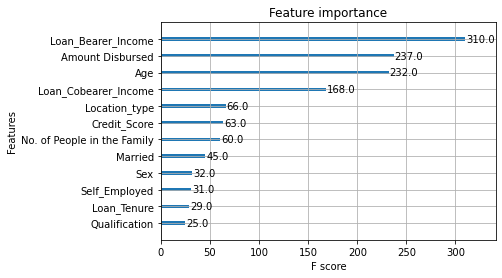

In [81]:
xgboost.plot_importance(xgb)

In [82]:
f_df2 = cluster_df2[['Loan_Bearer_Income','Amount Disbursed','Age','Loan_Cobearer_Income','Location_type',
                   'No. of People in the Family','Credit_Score','Loan_Status']]
f_df2.head()

,Loan_Bearer_Income,Amount Disbursed,Age,Loan_Cobearer_Income,Location_type,No. of People in the Family,Credit_Score,Loan_Status
0,0.072991,-0.453499,-0.673686,-0.554487,2.0,0.0,1.0,1.0
1,-0.134412,-0.216053,-0.550504,-0.038732,0.0,1.0,1.0,0.0
2,-0.393747,-0.952136,-0.920048,-0.554487,2.0,0.0,1.0,1.0
3,-0.462062,-0.311031,-0.673686,0.251980,2.0,0.0,1.0,1.0
4,0.097728,-0.061713,1.174034,-0.554487,2.0,0.0,1.0,1.0


In [83]:
CV_post_hpt(f_df2.drop('Loan_Status',axis=1),f_df2['Loan_Status'],
            f_df2.drop('Loan_Status',axis=1),f_df2['Loan_Status'])

,Model Name,Accuracy Score,Accuracy Std Dev,F1 Score,F1 Std Dev
0,Decision Tree Classifier,0.830645,0.025343,0.888822,0.015238
1,AdaBoost Classifier,0.830645,0.025343,0.888822,0.015238
2,Logistic Regression,0.824114,0.030757,0.885124,0.018173
3,Gradient Boosting Classifier,0.827366,0.033488,0.883455,0.021283
4,XGB Classifier,0.825780,0.042793,0.881514,0.028191
5,Gaussian Naive Bayes,0.817663,0.030400,0.878435,0.018889
6,Support Vector Classifier,0.811052,0.016826,0.877703,0.009579
7,Random Forest Classifier,0.812797,0.021345,0.874336,0.015989
8,K Neighbors Classifier,0.775278,0.038268,0.853889,0.024383


## RFE

In [84]:
rfe = RFE(xgb)

In [85]:
rfe.fit(X_train,y_train)

RFE(estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                            colsample_bylevel=1, colsample_bynode=1,
                            colsample_bytree=1, enable_categorical=False,
                            gamma=0, gpu_id=-1, importance_type=None,
                            interaction_constraints='',
                            learning_rate=0.300000012, max_delta_step=0,
                            max_depth=6, min_child_weight=1, missing=nan,
                            monotone_constraints='()', n_estimators=100,
                            n_jobs=8, num_parallel_tree=1, predictor='auto',
                            random_state=0, reg_alpha=0, reg_lambda=1,
                            scale_pos_weight=1, subsample=1,
                            tree_method='exact', validate_parameters=1,
                            verbosity=None))

In [86]:
rfe.support_

array([ True, False, False,  True,  True,  True,  True,  True, False,
       False,  True, False, False, False])

In [87]:
X_train.columns

Index(['Sex', 'Married', 'No. of People in the Family', 'Qualification',
       'Self_Employed', 'Loan_Tenure', 'Credit_Score', 'Location_type', 'Age',
       'Loan_Bearer_Income', 'Loan_Cobearer_Income', 'Amount Disbursed',
       'mean', 'median'],
      dtype='object')

In [88]:
rfe_df2 = cluster_df2[['Qualification','Self_Employed', 'Loan_Tenure', 'Credit_Score', 'Location_type', 
                       'Loan_Cobearer_Income', 'Amount Disbursed','Loan_Status']]
rfe_df2.head()

,Qualification,Self_Employed,Loan_Tenure,Credit_Score,Location_type,Loan_Cobearer_Income,Amount Disbursed,Loan_Status
0,0.0,0.0,9,1.0,2.0,-0.554487,-0.453499,1.0
1,0.0,0.0,9,1.0,0.0,-0.038732,-0.216053,0.0
2,0.0,1.0,9,1.0,2.0,-0.554487,-0.952136,1.0
3,1.0,0.0,9,1.0,2.0,0.251980,-0.311031,1.0
4,0.0,0.0,9,1.0,2.0,-0.554487,-0.061713,1.0


In [89]:
CV_post_hpt(rfe_df2.drop('Loan_Status',1),rfe_df2['Loan_Status'],
            rfe_df2.drop('Loan_Status',1),rfe_df2['Loan_Status'])

,Model Name,Accuracy Score,Accuracy Std Dev,F1 Score,F1 Std Dev
0,Decision Tree Classifier,0.830645,0.025343,0.888822,0.015238
1,AdaBoost Classifier,0.830645,0.025343,0.888822,0.015238
2,Logistic Regression,0.829006,0.025469,0.887882,0.015203
3,Gradient Boosting Classifier,0.827393,0.026321,0.886417,0.016132
4,Gaussian Naive Bayes,0.814384,0.037917,0.875674,0.024401
5,XGB Classifier,0.811185,0.037386,0.872473,0.025900
6,Support Vector Classifier,0.799630,0.025640,0.870708,0.015779
7,K Neighbors Classifier,0.778503,0.025382,0.856038,0.015355
8,Random Forest Classifier,0.781756,0.043690,0.844989,0.027927


## Learning curve analysis

In [90]:
def generate_learning_curve(model_name,estimator,X,y,cv=10):
    train_size,train_score,test_score = learning_curve(estimator=estimator,X=X,y=y,cv=cv)
    train_score_mean = np.mean(train_score,axis=1)
    test_score_mean = np.mean(test_score,axis=1)
    plt.plot(train_size,train_score_mean,c='blue')
    plt.plot(train_size,test_score_mean,c='red')   
    plt.xlabel('Samples')
    plt.ylabel('Accuracy')
    plt.title('Learning curve for '+model_name)
    plt.legend(('Training_accuracy','Testing_accuracy'))

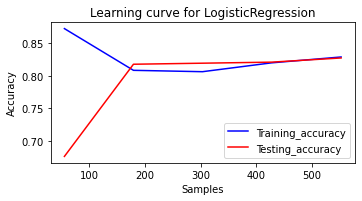

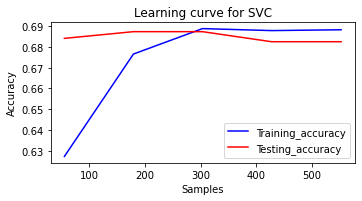

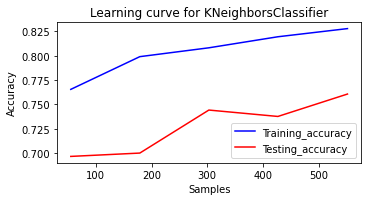

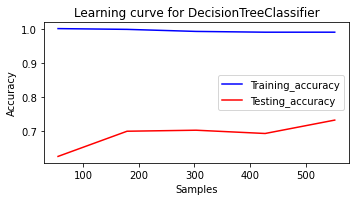

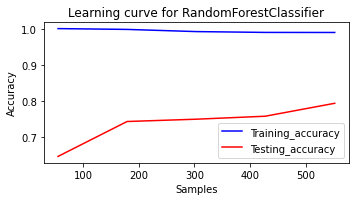

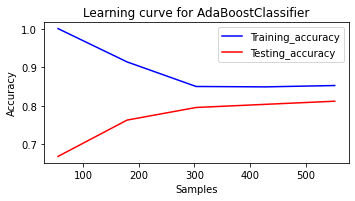

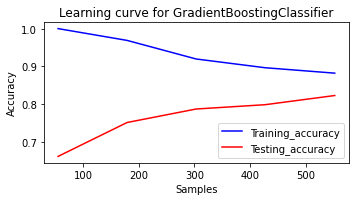

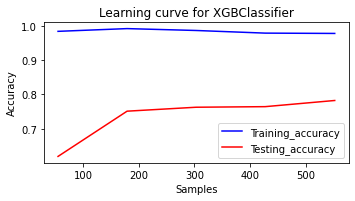

In [91]:
model_names = [LogisticRegression(),SVC(),KNeighborsClassifier(),DecisionTreeClassifier(),
                   RandomForestClassifier(),AdaBoostClassifier(),GradientBoostingClassifier(),
                   XGBClassifier(verbosity = 0)]
for a ,model in enumerate(model_names):
    fg = plt.figure(figsize=(12,15))
    ax = fg.add_subplot(5,2,a+1)
    generate_learning_curve(type(model_names[a]).__name__,model,rfe_df2.drop('Loan_Status',1),rfe_df2['Loan_Status'])